In [1]:
# DFI 16S Data Analysis Data Dump 1
# Combine classifier analysis with metadata
# Data Exploration Plots
# Initial PCA, UMAP plots
# Testing out ML Clustering Modules on the dataset

In [2]:
import os
import pandas as pd

# File paths
classification_path = '/Users/donwolfgeher/Desktop/MSBI_39903_Capstone_III/Capstone_Project_DFI/MMF.16S.378_RDP_19_min100_max400_classifier_2024.5_final_classification.csv'
metadata_path = '/Users/donwolfgeher/Desktop/MSBI_39903_Capstone_III/Capstone_Project_DFI/MMF.16S.378_RDP_19_min100_max400_classifier_2024.5_final_metadata.tsv'

# Check if files exist
if not os.path.exists(classification_path):
    print(f"File not found: {classification_path}")
if not os.path.exists(metadata_path):
    print(f"File not found: {metadata_path}")

# Proceed only if both files exist
if os.path.exists(classification_path) and os.path.exists(metadata_path):
    # Load the data
    classification_df = pd.read_csv(classification_path)  # CSV file
    metadata_df = pd.read_csv(metadata_path, sep='\t')  # TSV file

    # Merge the dataframes
    if 'sampleid' in classification_df.columns and 'sampleid' in metadata_df.columns:
        merged_df = pd.merge(metadata_df, classification_df, on='sampleid', how='inner')
        print("Merged DataFrame shape:", merged_df.shape)
        print(merged_df.head())

        # Save the merged dataframe
        output_path = '/Users/donwolfgeher/Desktop/MSBI_39903_Capstone_III/Capstone_Project_DFI/MMF.16S.378_RDP_19_min100_max400_classifier_2024.5_final_merged.csv'
        merged_df.to_csv(output_path, index=False)
        print(f"Merged DataFrame saved to: {output_path}")
    else:
        print("Error: 'sample_id' column is missing in one of the datasets.")
else:
    print("Please check the file paths and ensure the files exist.")


Merged DataFrame shape: (563, 78)
  sampleid       request by lab affiliation experiment sample name group_x  \
0   16S.LC  Laurie Comstock        Comstock                     Pj     NaN   
1   16S.LC  Laurie Comstock        Comstock                     Pj     NaN   
2   16S.LC  Laurie Comstock        Comstock                     Pj     NaN   
3   16S.LC  Laurie Comstock        Comstock                     Pj     NaN   
4   16S.LC  Laurie Comstock        Comstock                     Pj     NaN   

   mouse number _x sample weight_x treatment_x sample location_x  species_x  \
0              NaN          100 mg         NaN               DFI        NaN   
1              NaN          100 mg         NaN               DFI        NaN   
2              NaN          100 mg         NaN               DFI        NaN   
3              NaN          100 mg         NaN               DFI        NaN   
4              NaN          100 mg         NaN               DFI        NaN   

   ...   pctseqs reads

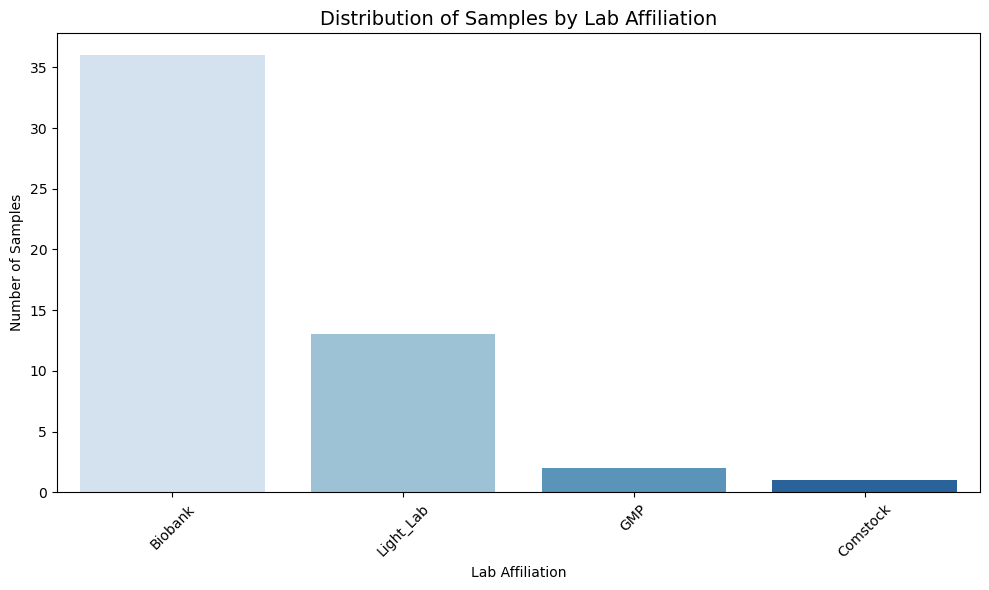

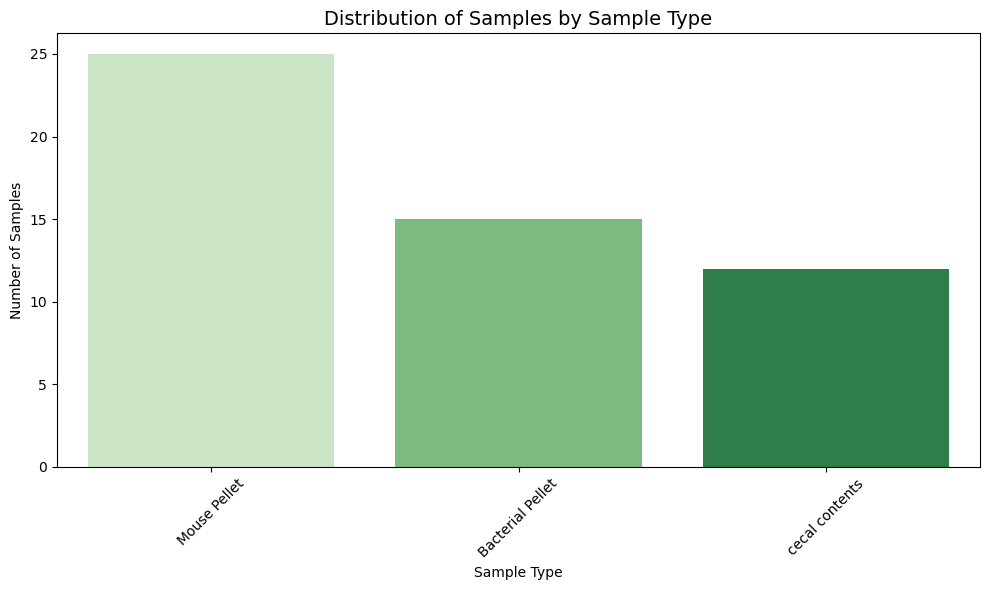

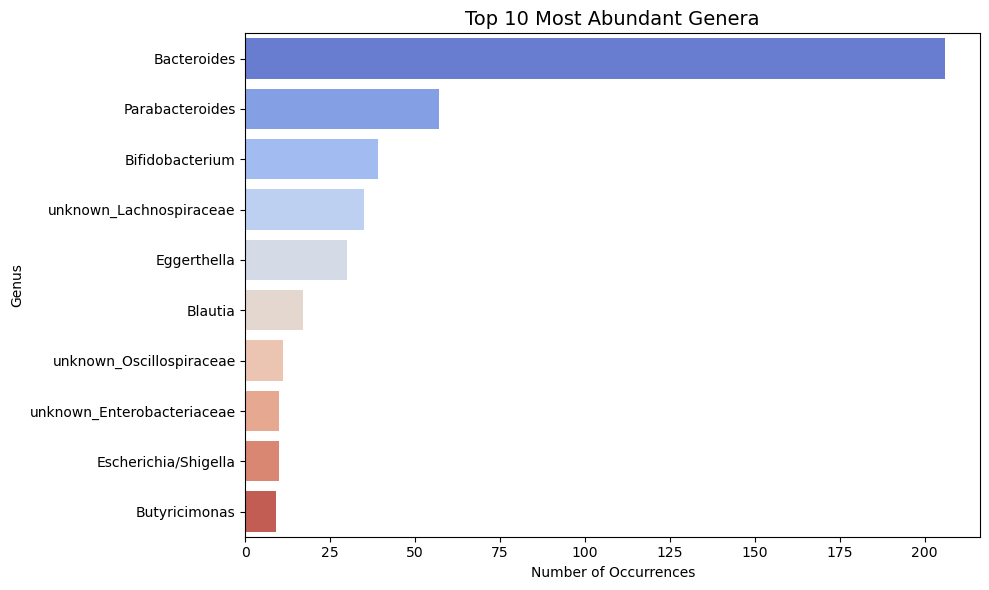

Merged Data Columns: ['sampleid', 'request by', 'lab affiliation', 'experiment sample name', 'group_x', 'mouse number _x', 'sample weight_x', 'treatment_x', 'sample location_x', 'species_x', 'mouse strain _x', 'sample type', 'sample submission date_x', 'forwardbarcode_x', 'reversebarcode_x', 'libraryname_x', 'adapter_x', 'pcr_x', 'miseq submission_x', 'miseq data receive date_x', 'dnaconc_x', 'fwBarcodeSequence', 'fwdLinkerPrimerSequence', 'rvBarcodeSequence', 'rvLinkerPrimerSequence', 'input', 'filtered_x', 'percentage of input passed filter_x', 'denoised', 'merged_x', 'percentage of input merged_x', 'non-chimeric_x', 'percentage of input non-chimeric_x', 'libraryname_y', 'asv', 'Taxon', 'Confidence', 'numseqs', 'group_y', 'mouse number _y', 'sample weight_y', 'treatment_y', 'sample location_y', 'species_y', 'mouse strain _y', 'sample.type', 'sample submission date_y', 'forwardbarcode_y', 'reversebarcode_y', 'adapter_y', 'pcr_y', 'miseq submission_y', 'miseq data receive date_y', 'dna

In [3]:
# EDA 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to render plots on mac
import matplotlib
matplotlib.use("MacOSX")
%matplotlib inline


# Summarize the merged CSV results
merged_summary = merged_df.describe(include='all').transpose()

# Generate EDA plots

# 1. Distribution of samples by lab affiliation
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata_df, x='lab affiliation', order=metadata_df['lab affiliation'].value_counts().index, palette="Blues")
plt.title('Distribution of Samples by Lab Affiliation', fontsize=14)
plt.xlabel('Lab Affiliation')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Sample type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata_df, x='sample type', order=metadata_df['sample type'].value_counts().index, palette="Greens")
plt.title('Distribution of Samples by Sample Type', fontsize=14)
plt.xlabel('Sample Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top 10 genera abundance
top_genera = merged_df['Genus'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genera.values, y=top_genera.index, palette="coolwarm")
plt.title('Top 10 Most Abundant Genera', fontsize=14)
plt.xlabel('Number of Occurrences')
plt.ylabel('Genus')
plt.tight_layout()
plt.show()

# 4. Alpha diversity (Shannon Index) distribution
if 'Shannon' in merged_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_df, x='Shannon', bins=30, kde=True, color='purple')
    plt.title('Shannon Diversity Index Distribution', fontsize=14)
    plt.xlabel('Shannon Index')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

import pandas as pd

# Load and display column names
print("Merged Data Columns:", merged_df.columns.tolist())
print("Classification Data Columns:", classification_df.columns.tolist())
print("Metadata Columns:", metadata_df.columns.tolist())




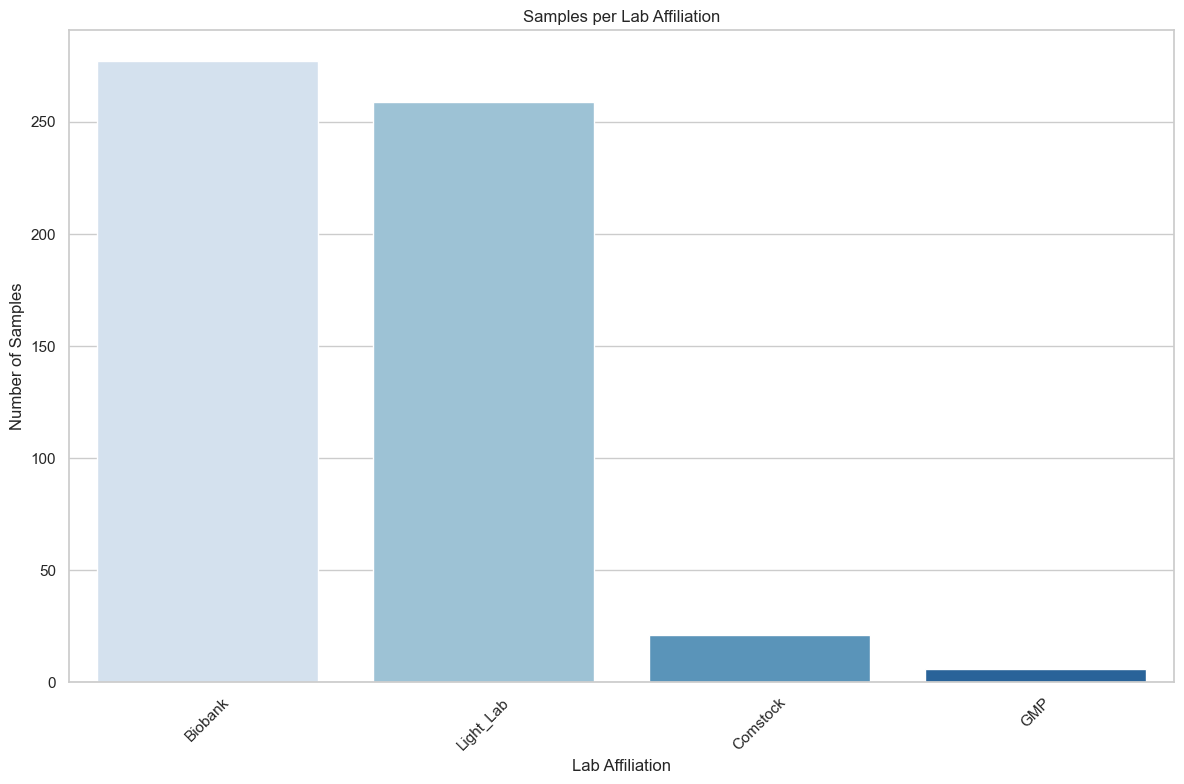

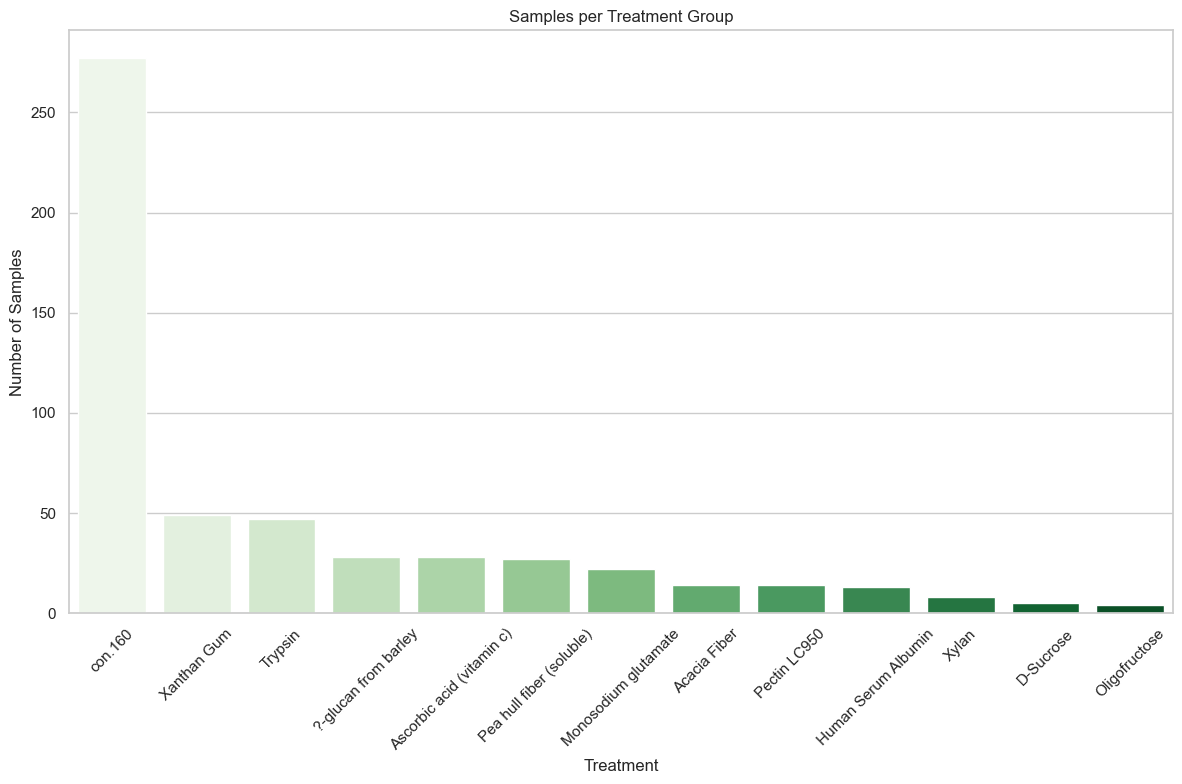

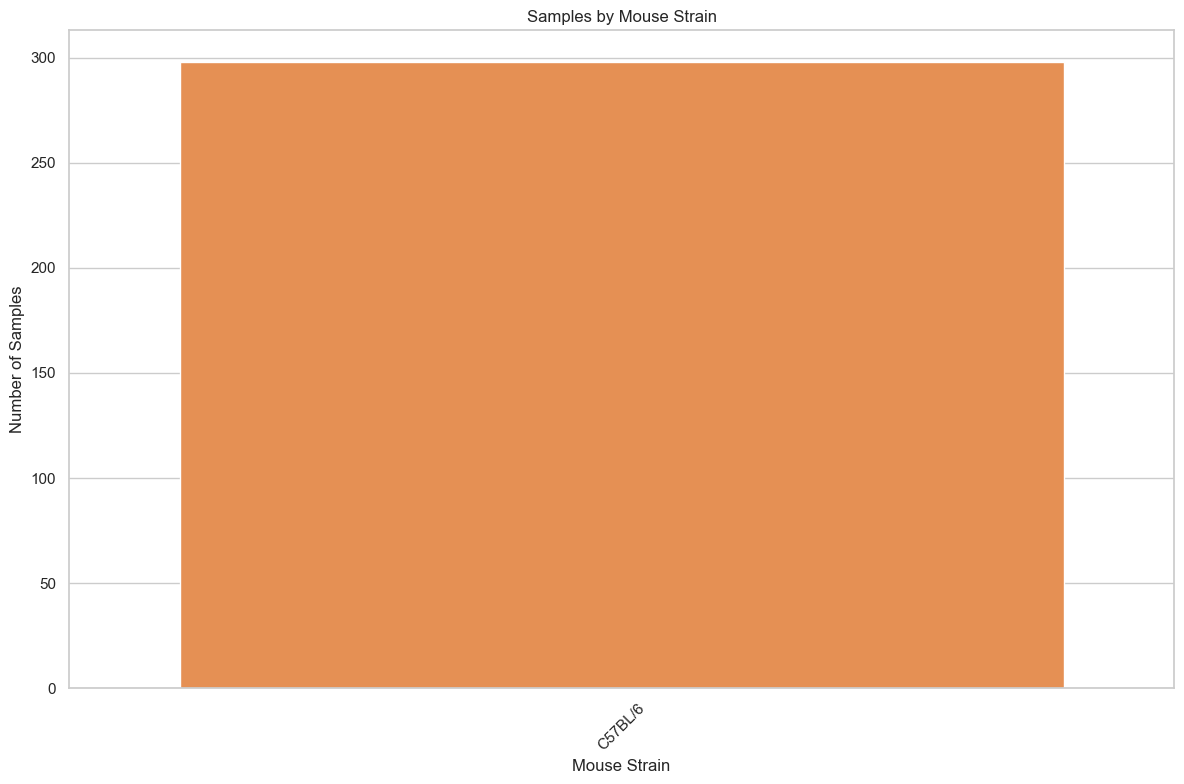

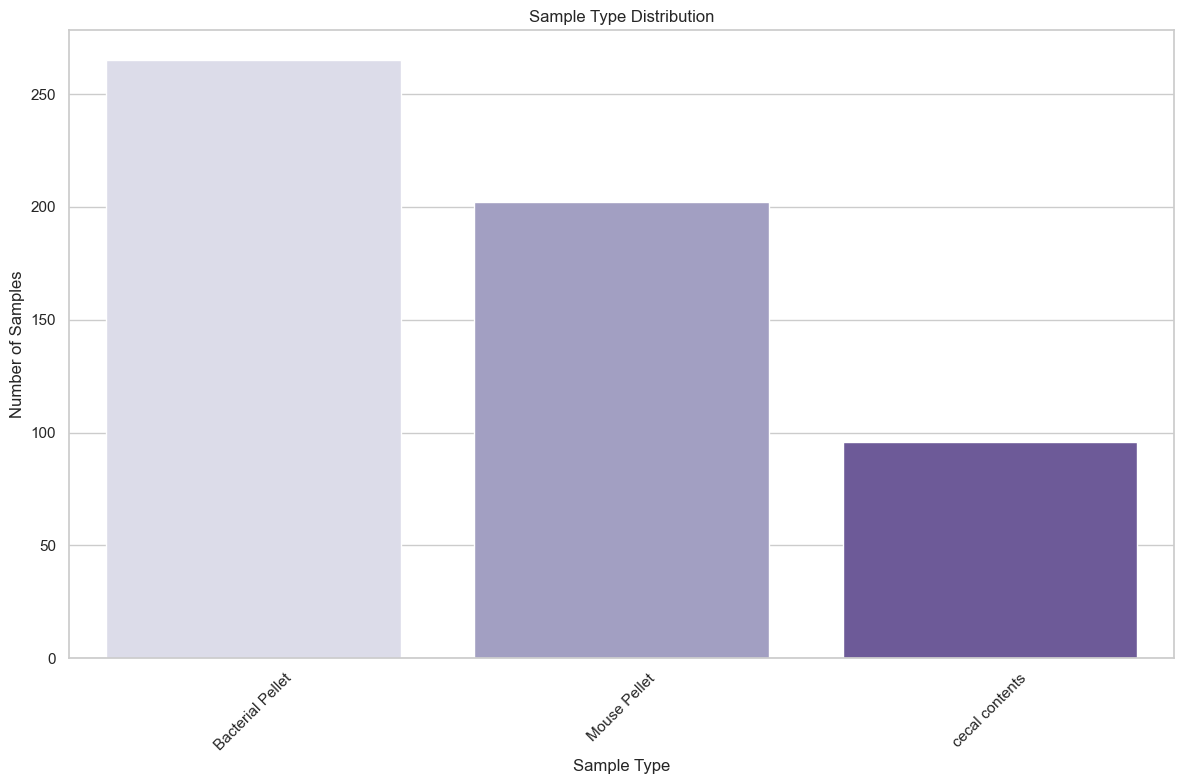

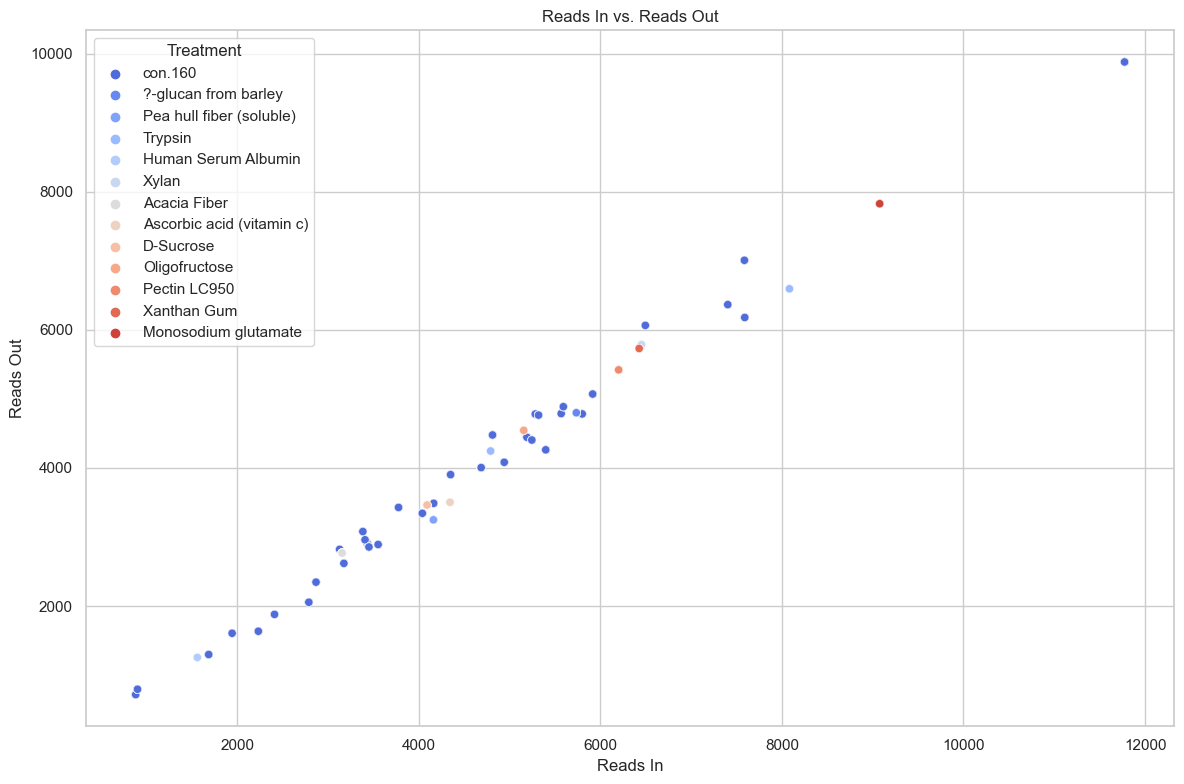

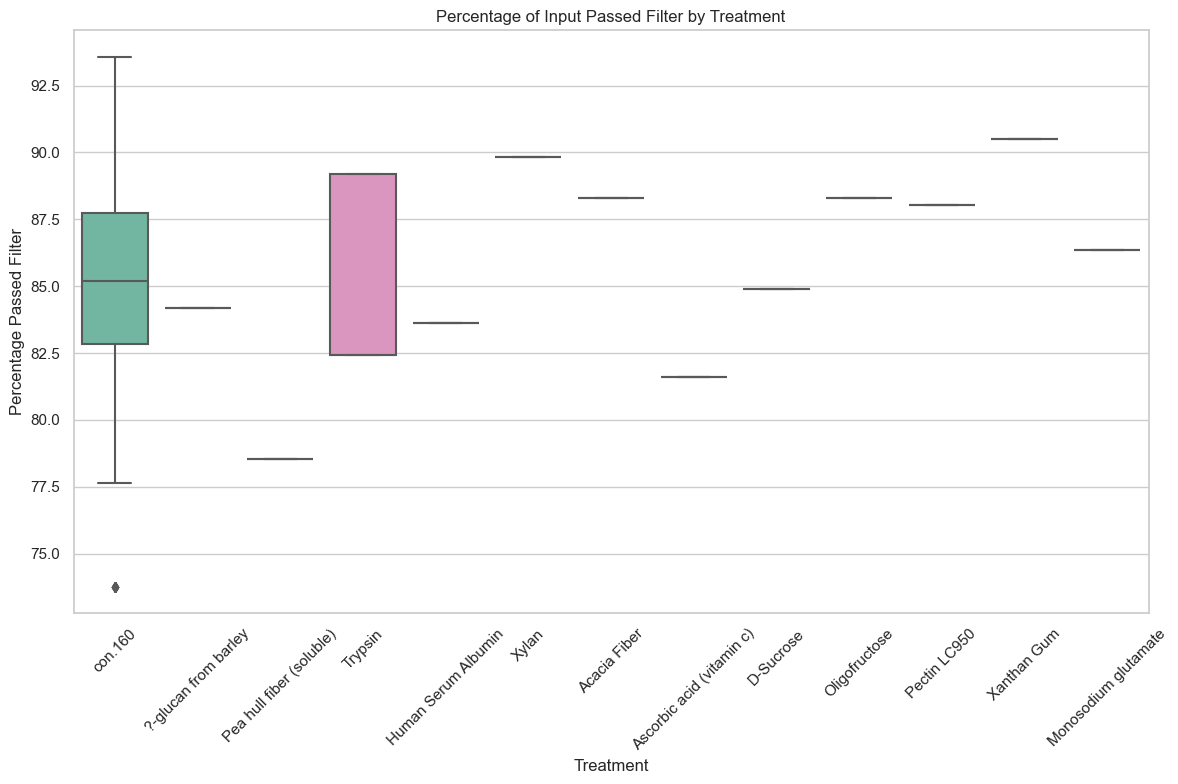

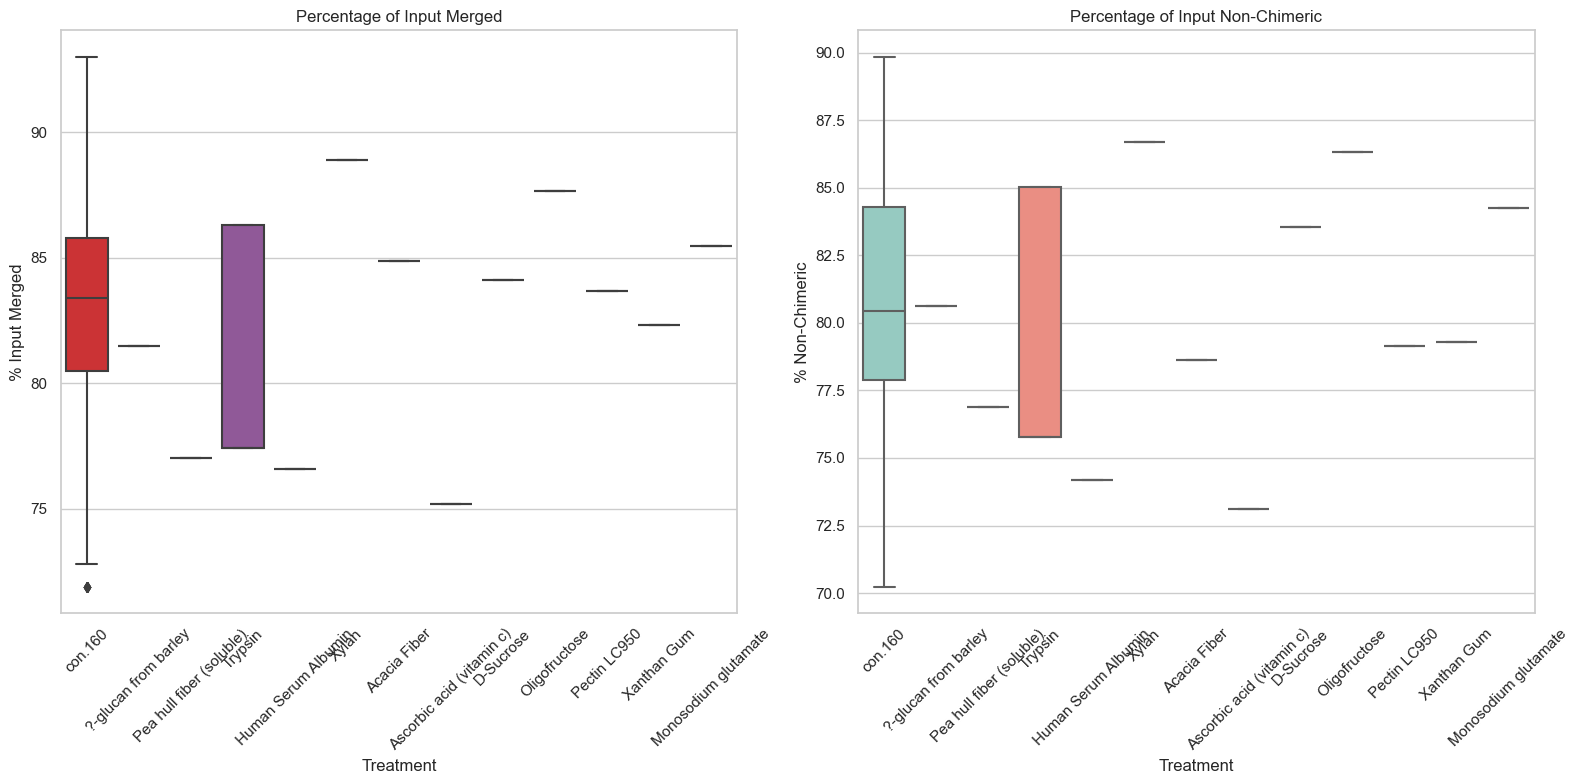

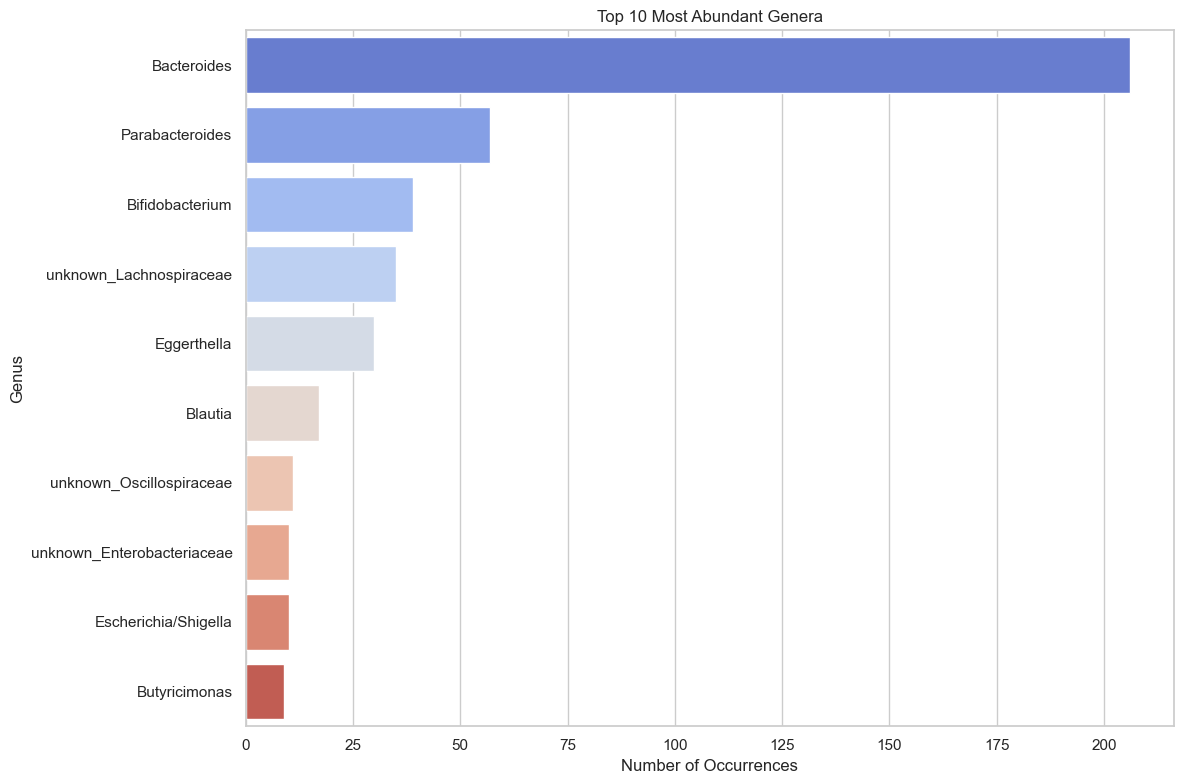

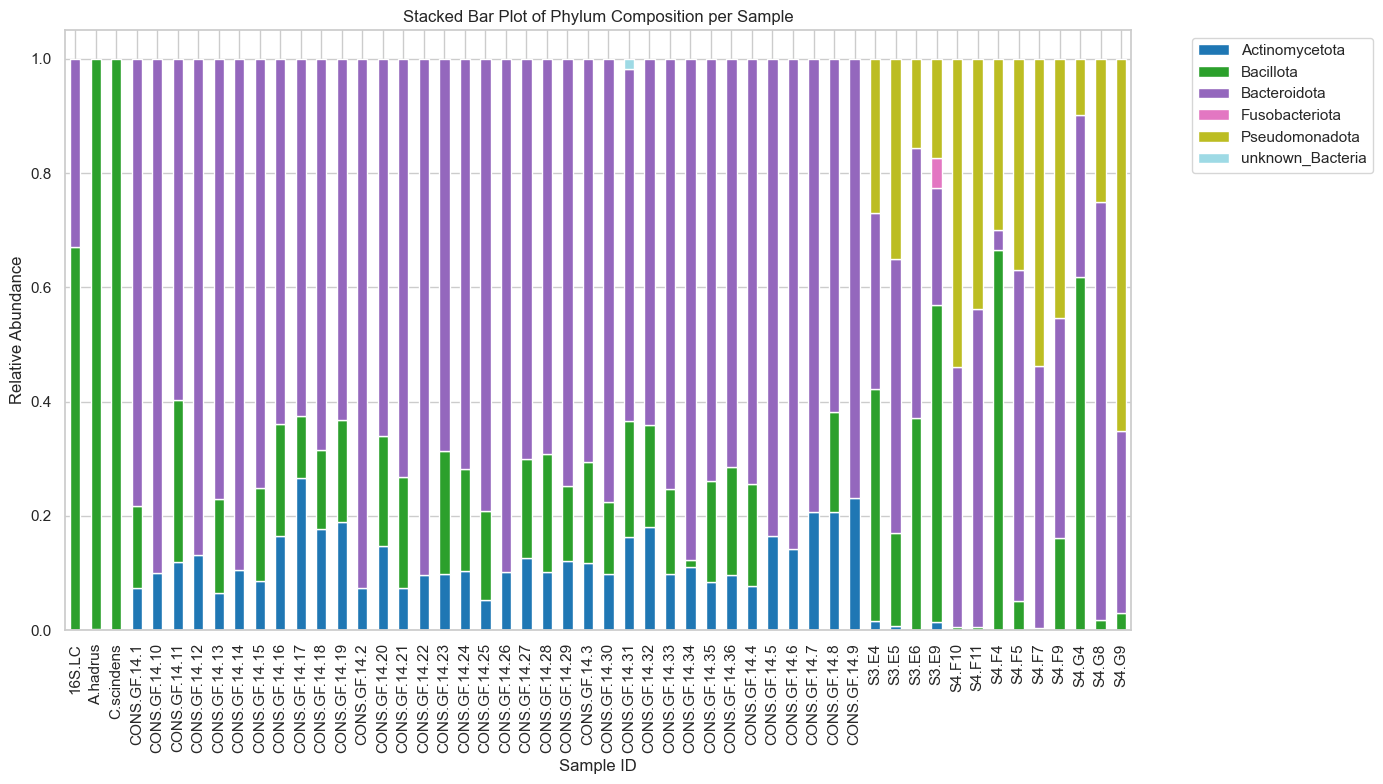

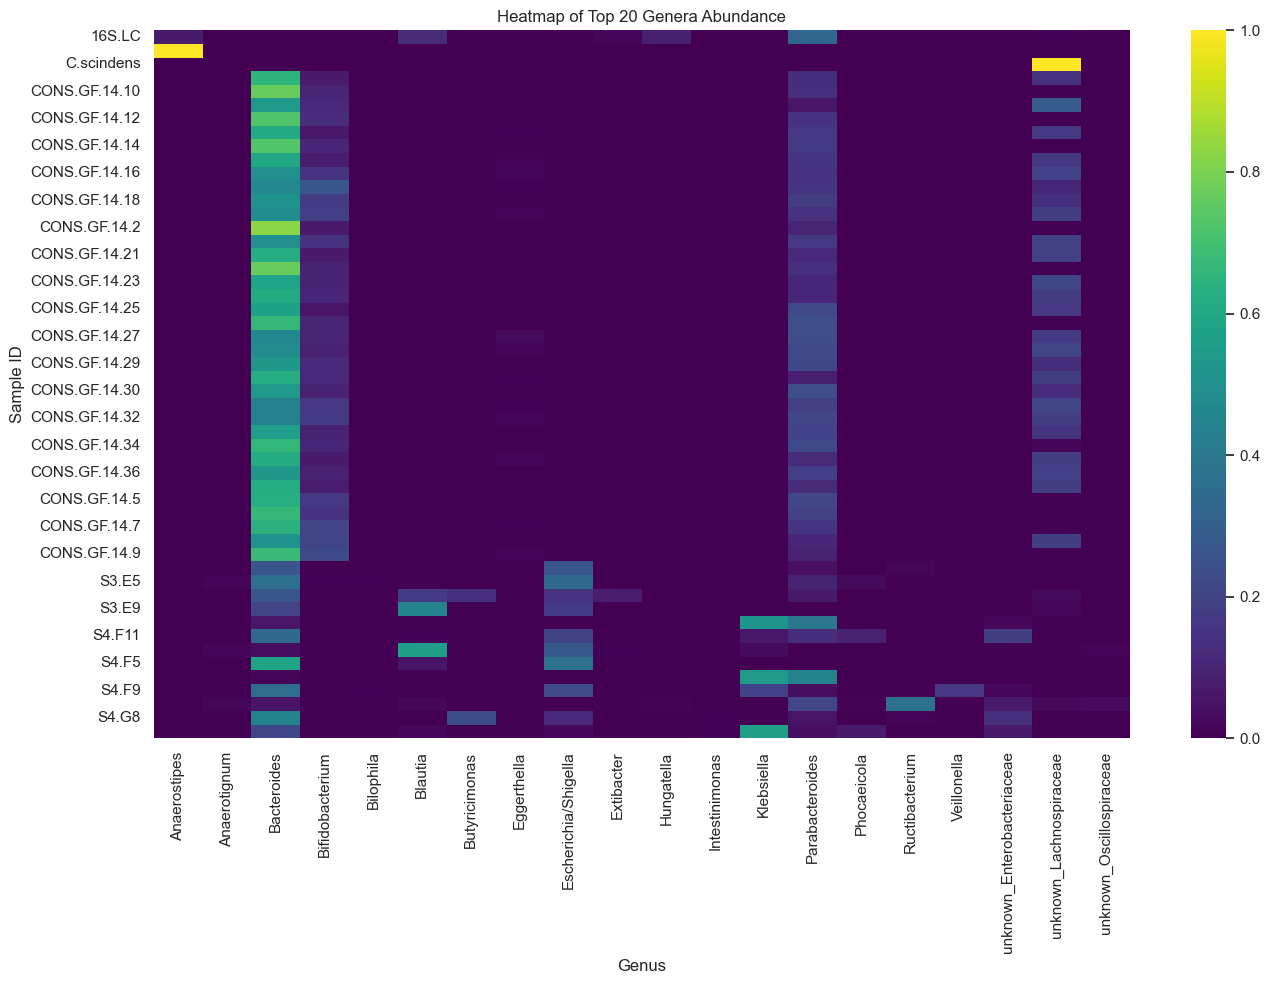

In [4]:
# 250221 EDA plots 3 of 3 after column header info 
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (12, 8), 'font.size': 12})

# Load the merged dataframe (assuming it's already loaded as 'merged_df')

# 1. Sample Metadata Distribution

# 1a. Samples per Lab Affiliation
plt.figure()
sns.countplot(data=merged_df, x='lab affiliation', order=merged_df['lab affiliation'].value_counts().index, palette="Blues")
plt.title('Samples per Lab Affiliation')
plt.xlabel('Lab Affiliation')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1b. Samples per Treatment Group
plt.figure()
sns.countplot(data=merged_df, x='treatment_x', order=merged_df['treatment_x'].value_counts().index, palette="Greens")
plt.title('Samples per Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1c. Samples by Mouse Strain
plt.figure()
sns.countplot(data=merged_df, x='mouse strain _x', order=merged_df['mouse strain _x'].value_counts().index, palette="Oranges")
plt.title('Samples by Mouse Strain')
plt.xlabel('Mouse Strain')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1d. Sample Type Distribution
plt.figure()
sns.countplot(data=merged_df, x='sample type', order=merged_df['sample type'].value_counts().index, palette="Purples")
plt.title('Sample Type Distribution')
plt.xlabel('Sample Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Sequencing Quality Metrics

# 2a. Reads In vs. Reads Out
plt.figure()
sns.scatterplot(data=merged_df, x='reads in', y='reads out', hue='treatment_x', palette="coolwarm", alpha=0.7)
plt.title('Reads In vs. Reads Out')
plt.xlabel('Reads In')
plt.ylabel('Reads Out')
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

# 2b. Percentage of Input Passed Filter
plt.figure()
sns.boxplot(data=merged_df, x='treatment_x', y='percentage of input passed filter_x', palette="Set2")
plt.title('Percentage of Input Passed Filter by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Percentage Passed Filter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2c. Percentage of Input Merged and Non-Chimeric Reads
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(data=merged_df, x='treatment_x', y='percentage of input merged_x', ax=ax[0], palette="Set1")
ax[0].set_title('Percentage of Input Merged')
ax[0].set_xlabel('Treatment')
ax[0].set_ylabel('% Input Merged')
ax[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=merged_df, x='treatment_x', y='percentage of input non-chimeric_x', ax=ax[1], palette="Set3")
ax[1].set_title('Percentage of Input Non-Chimeric')
ax[1].set_xlabel('Treatment')
ax[1].set_ylabel('% Non-Chimeric')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Microbial Composition & Diversity

# 3a. Top 10 Genera Abundance
top_genera = merged_df['Genus'].value_counts().nlargest(10)
plt.figure()
sns.barplot(x=top_genera.values, y=top_genera.index, palette="coolwarm")
plt.title('Top 10 Most Abundant Genera')
plt.xlabel('Number of Occurrences')
plt.ylabel('Genus')
plt.tight_layout()
plt.show()

# 3b. Stacked Bar Plot of Microbial Composition (Phylum Level)
phylum_abundance = merged_df.groupby(['sampleid', 'Phylum'])['pctseqs'].sum().reset_index()
phylum_pivot = phylum_abundance.pivot(index='sampleid', columns='Phylum', values='pctseqs').fillna(0)
phylum_pivot_normalized = phylum_pivot.div(phylum_pivot.sum(axis=1), axis=0)

phylum_pivot_normalized.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Stacked Bar Plot of Phylum Composition per Sample')
plt.xlabel('Sample ID')
plt.ylabel('Relative Abundance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3c. Heatmap of Top 20 Genera Abundance
top20_genera = merged_df['Genus'].value_counts().nlargest(20).index
genera_abundance = merged_df[merged_df['Genus'].isin(top20_genera)].groupby(['sampleid', 'Genus'])['pctseqs'].sum().unstack().fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(genera_abundance, cmap="viridis")
plt.title('Heatmap of Top 20 Genera Abundance')
plt.xlabel('Genus')
plt.ylabel('Sample ID')
plt.tight_layout()
plt.show()

# 4. Alpha Diversity (if applicable: assuming 'Shannon' column exists in merged_df)
if 'Shannon' in merged_df.columns:
    plt.figure()
    sns.boxplot(data=merged_df, x='treatment_x', y='Shannon', palette="pastel")
    plt.title('Shannon Diversity Index by Treatment')
    plt.xlabel('Treatment')
    plt.ylabel('Shannon Index')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



🚀 Step 1: Computing UMAP on Genus Data for 12 Clusters



/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


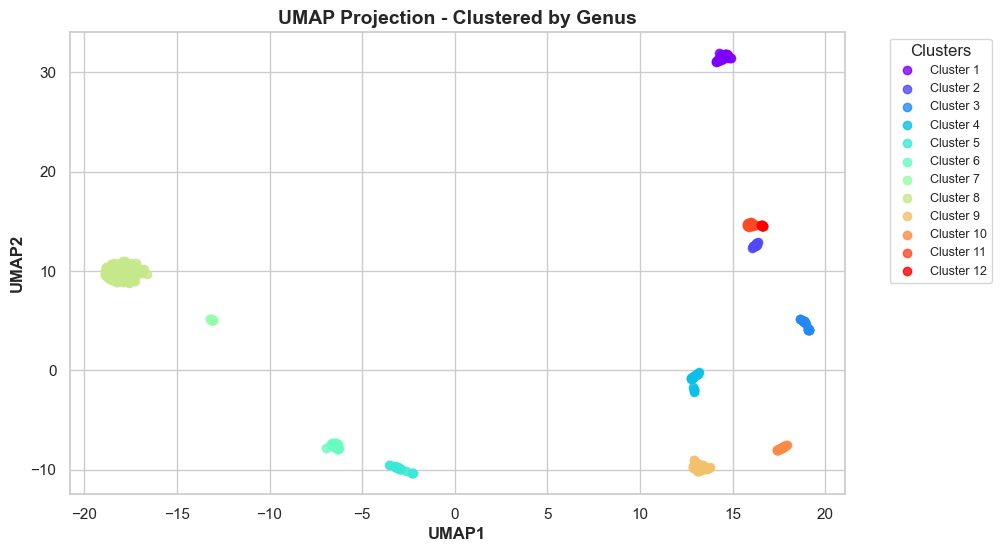

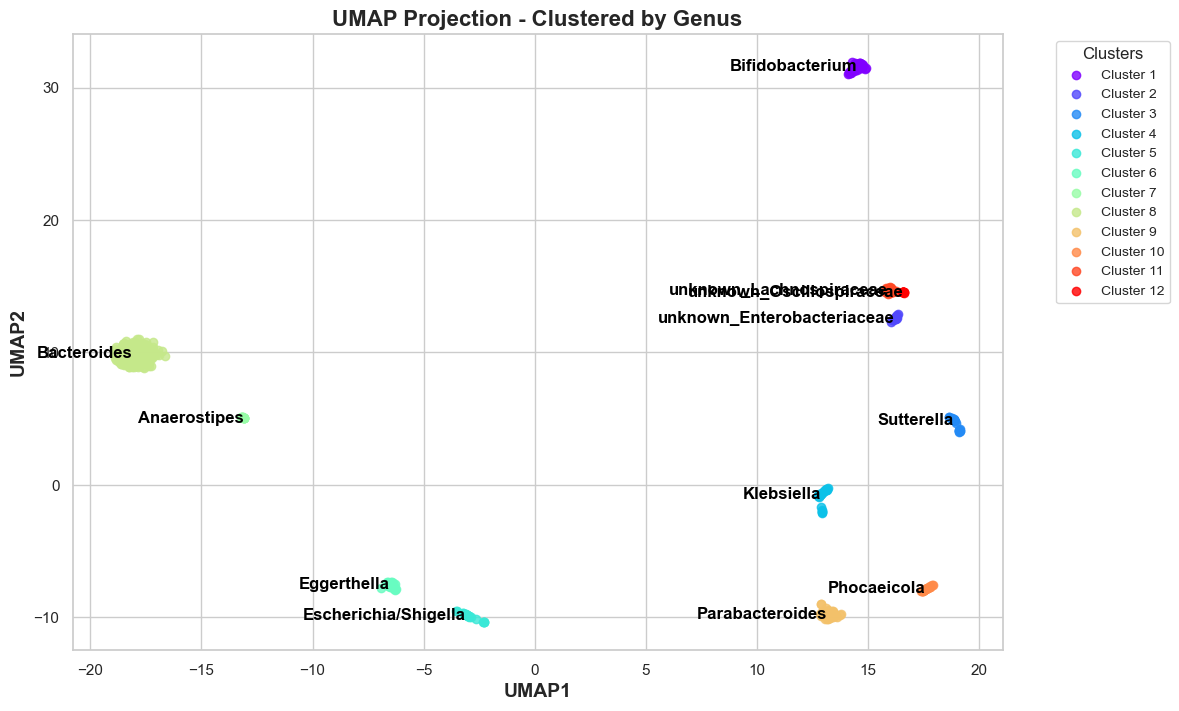

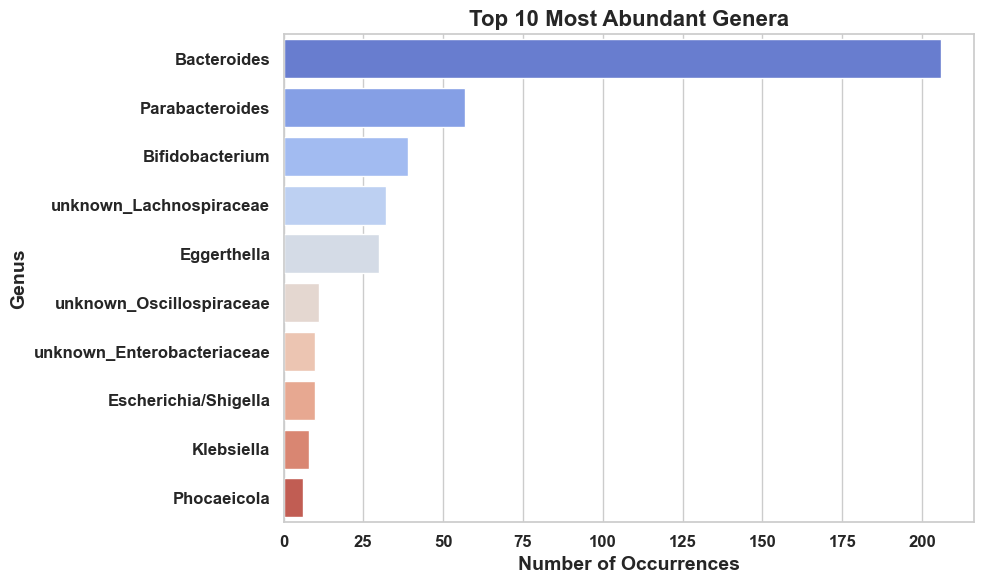

<Figure size 1400x700 with 0 Axes>

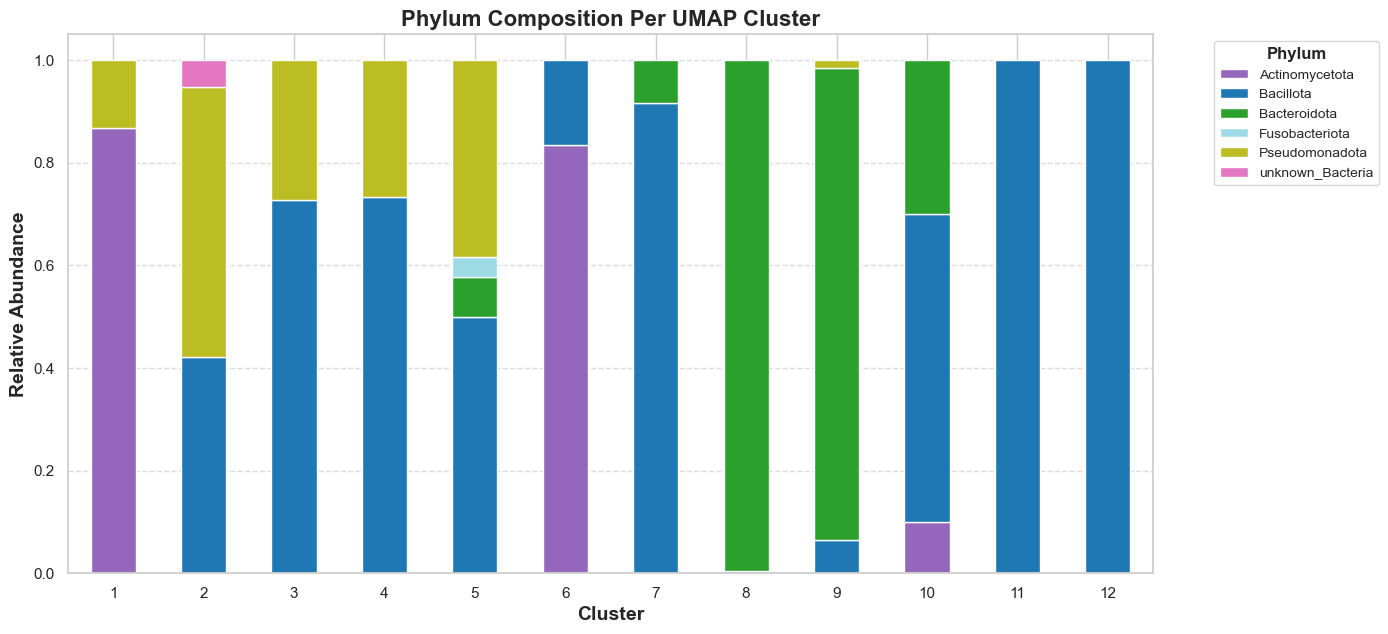

In [5]:
# UMAP Genus Clusters - Fig 2A, 2B, 2C (Final)
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Compute UMAP projection on Genus to obtain 12 clusters
print("\n🚀 Step 1: Computing UMAP on Genus Data for 12 Clusters\n")
encoded_genus = LabelEncoder().fit_transform(merged_df["Genus"])

# Apply UMAP to Genus data
reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = reducer.fit_transform(encoded_genus.reshape(-1, 1))

# Store UMAP results in dataframe
merged_df["UMAP1_Genus"] = umap_results[:, 0]
merged_df["UMAP2_Genus"] = umap_results[:, 1]

# Step 2: Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(umap_results)
merged_df["Genus_Cluster"] = cluster_labels

# Ensure exactly 12 clusters (excluding -1, 0 if present)
valid_clusters = sorted([c for c in np.unique(cluster_labels) if c > 0])[:12]
merged_df = merged_df[merged_df["Genus_Cluster"].isin(valid_clusters)]

# Fix cluster numbering (Ensure clusters start from 1 to 12)
cluster_mapping = {old: new for new, old in enumerate(valid_clusters, start=1)}
merged_df["Genus_Cluster"] = merged_df["Genus_Cluster"].map(cluster_mapping)

# Identify the most abundant Genus in each cluster
top_genus_per_cluster = merged_df.groupby("Genus_Cluster")["Genus"].apply(lambda x: x.value_counts().idxmax()).to_dict()

# Generate distinct colors for each cluster
cmap = plt.get_cmap("rainbow", len(valid_clusters))
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(valid_clusters)}

### **Fig 2A: UMAP Projection - Clustered by Genus (No Labels)**
plt.figure(figsize=(10, 6))
for cluster in valid_clusters:
    cluster_data = merged_df[merged_df["Genus_Cluster"] == cluster]
    plt.scatter(
        cluster_data["UMAP1_Genus"], cluster_data["UMAP2_Genus"], 
        color=cluster_colors[cluster], alpha=0.8, label=f"Cluster {cluster}"
    )

plt.title("UMAP Projection - Clustered by Genus", fontsize=14, fontweight='bold', family='Arial')
plt.xlabel("UMAP1", fontsize=12, fontweight='bold', family='Arial')
plt.ylabel("UMAP2", fontsize=12, fontweight='bold', family='Arial')
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True)

# Save as TIFF
plt.savefig("Fig2A_UMAP_Genus_nolabels.tiff", dpi=300, bbox_inches='tight', format='tiff')
plt.show()

### **Fig 2A Labeled: UMAP with Top Genus Labels**
plt.figure(figsize=(12, 8))
for cluster in valid_clusters:
    cluster_data = merged_df[merged_df["Genus_Cluster"] == cluster]
    plt.scatter(
        cluster_data["UMAP1_Genus"], cluster_data["UMAP2_Genus"], 
        color=cluster_colors[cluster], alpha=0.8, label=f"Cluster {cluster}"
    )

    # Get cluster centroid for label positioning
    cluster_center = cluster_data[["UMAP1_Genus", "UMAP2_Genus"]].median()

    # Shift label towards the x-axis for clarity
    offset_x = -((cluster_data["UMAP1_Genus"].max() - cluster_data["UMAP1_Genus"].min()) * 0.05)
    offset_y = (cluster_data["UMAP2_Genus"].max() - cluster_data["UMAP2_Genus"].min()) * 0.02

    # Add text label with bold black font
    plt.text(
        cluster_center["UMAP1_Genus"] + offset_x, cluster_center["UMAP2_Genus"] + offset_y,
        top_genus_per_cluster.get(cluster, ""), fontsize=12, fontweight='bold', 
        color='black', ha="right", va="center"
    )

plt.title("UMAP Projection - Clustered by Genus", fontsize=16, fontweight='bold', family='Arial')
plt.xlabel("UMAP1", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("UMAP2", fontsize=14, fontweight='bold', family='Arial')
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)

# Save as TIFF
plt.savefig("Fig2A_UMAP_Genus_Labeled.tiff", dpi=300, bbox_inches='tight', format='tiff')
plt.show()

### **Fig 2B: Bar Plot of Top 10 Most Abundant Genera**
top_genera = merged_df['Genus'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genera.values, y=top_genera.index, palette="coolwarm")

plt.title("Top 10 Most Abundant Genera", fontsize=16, fontweight='bold', family='Arial')
plt.xlabel("Number of Occurrences", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Genus", fontsize=14, fontweight='bold', family='Arial')

plt.xticks(fontsize=12, fontweight='bold', family='Arial')
plt.yticks(fontsize=12, fontweight='bold', family='Arial')

plt.tight_layout()

# Save as TIFF
plt.savefig("Fig2B_Top_10_Genera.tiff", dpi=300, bbox_inches="tight", format="tiff")
plt.show()

### **Fig 2C: Stacked Bar Plot of Phylum Composition Per Cluster**
# Aggregate top phyla per cluster
phyla_per_cluster = merged_df.groupby(["Genus_Cluster", "Phylum"]).size().unstack(fill_value=0)

# Normalize within each cluster for relative abundance
phyla_per_cluster = phyla_per_cluster.div(phyla_per_cluster.sum(axis=1), axis=0)

# Generate consistent colors for Phylum
unique_phyla = merged_df["Phylum"].dropna().unique()
phylum_cmap = plt.get_cmap("tab20", len(unique_phyla))
phylum_colors = {phylum: phylum_cmap(i) for i, phylum in enumerate(unique_phyla)}

# Plot stacked bar chart
plt.figure(figsize=(14, 7))
phyla_per_cluster.plot(kind="bar", stacked=True, figsize=(14, 7), color=[phylum_colors[phylum] for phylum in phyla_per_cluster.columns])

plt.title("Phylum Composition Per UMAP Cluster", fontsize=16, fontweight='bold', family='Arial')
plt.xlabel("Cluster", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Relative Abundance", fontsize=14, fontweight='bold', family='Arial')
plt.xticks(rotation=0)

# Make legend bold
legend = plt.legend(title="Phylum", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.setp(legend.get_title(), fontweight='bold', fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as TIFF
plt.savefig("Fig2C_Stacked_Barplot_Phylum_Per_Cluster.tiff", dpi=300, bbox_inches="tight", format="tiff")
plt.show()



🚀 Step 1: Computing 3D UMAP on Genus Data



/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



📊 Step 2: Applying HDBSCAN for 3D Clustering



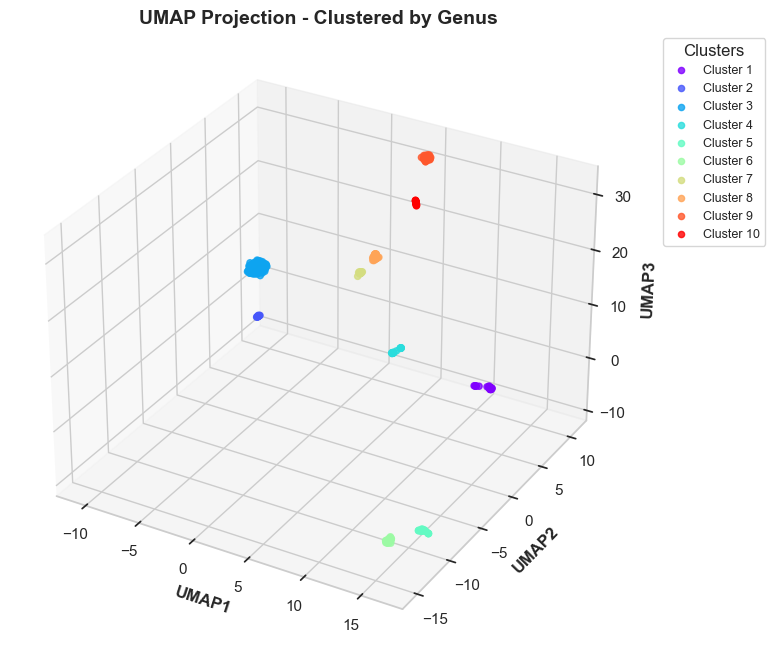

📁 Interactive 3D plot saved as Fig2A_UMAP_Genus_3D_Interactive.html


In [6]:
# UMAP by Genus in 3D (Static & Interactive)
import umap
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Step 1: Compute UMAP projection on Genus for 3D clustering
print("\n🚀 Step 1: Computing 3D UMAP on Genus Data\n")
encoded_genus = LabelEncoder().fit_transform(merged_df["Genus"])

# Apply UMAP for 3D dimensionality reduction
reducer_3d = umap.UMAP(n_components=3, random_state=42)
umap_results_3d = reducer_3d.fit_transform(encoded_genus.reshape(-1, 1))

# Store UMAP results in dataframe
merged_df["UMAP1"] = umap_results_3d[:, 0]
merged_df["UMAP2"] = umap_results_3d[:, 1]
merged_df["UMAP3"] = umap_results_3d[:, 2]

# Step 2: Apply HDBSCAN clustering
print("\n📊 Step 2: Applying HDBSCAN for 3D Clustering\n")
clusterer_3d = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels_3d = clusterer_3d.fit_predict(umap_results_3d)
merged_df["Genus_Cluster_3D"] = cluster_labels_3d

# Ensure exactly 12 clusters (excluding -1, 0 if present)
valid_clusters_3d = sorted([c for c in np.unique(cluster_labels_3d) if c > 0])[:12]
merged_df = merged_df[merged_df["Genus_Cluster_3D"].isin(valid_clusters_3d)]

# Fix cluster numbering (Ensure clusters start from 1 to 12)
cluster_mapping_3d = {old: new for new, old in enumerate(valid_clusters_3d, start=1)}
merged_df["Genus_Cluster_3D"] = merged_df["Genus_Cluster_3D"].map(cluster_mapping_3d)

# Generate distinct colors for each cluster
cmap = plt.get_cmap("rainbow", len(valid_clusters_3d))
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(valid_clusters_3d)}

### **Static 3D Plot**
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in valid_clusters_3d:
    cluster_data = merged_df[merged_df["Genus_Cluster_3D"] == cluster]
    ax.scatter(
        cluster_data["UMAP1"], cluster_data["UMAP2"], cluster_data["UMAP3"],
        color=cluster_colors[cluster], alpha=0.8, label=f"Cluster {cluster}"
    )

ax.set_title("UMAP Projection - Clustered by Genus", fontsize=14, fontweight='bold', family='Arial')
ax.set_xlabel("UMAP1", fontsize=12, fontweight='bold', family='Arial')
ax.set_ylabel("UMAP2", fontsize=12, fontweight='bold', family='Arial')
ax.set_zlabel("UMAP3", fontsize=12, fontweight='bold', family='Arial')
ax.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Save as TIFF
plt.savefig("Fig2A_UMAP_Genus_3D.tiff", dpi=300, bbox_inches='tight', format='tiff')
plt.show()

### **Interactive 3D Plot**
merged_df["Cluster_Label_3D"] = merged_df["Genus_Cluster_3D"].astype(str)

# Define color mapping
color_map = px.colors.qualitative.Set3  # Use a distinct color set
cluster_color_dict = {str(cluster): color_map[i % len(color_map)] for i, cluster in enumerate(valid_clusters_3d)}

# Generate interactive 3D Scatter Plot
fig_3d = px.scatter_3d(
    merged_df, 
    x="UMAP1", 
    y="UMAP2", 
    z="UMAP3", 
    color="Cluster_Label_3D", 
    color_discrete_map=cluster_color_dict, 
    hover_data=["Genus"], 
    title="Interactive 3D UMAP - Clustered by Genus"
)

# Save as interactive HTML file
html_filename = "Fig2A_UMAP_Genus_3D_Interactive.html"
fig_3d.write_html(html_filename)
print(f"📁 Interactive 3D plot saved as {html_filename}")

# Show interactive plot
fig_3d.show()



🚀 Step 1: Computing UMAP on Genus Data



/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP Results Shape: (476, 2)
   UMAP1_Genus  UMAP2_Genus
1    15.541702     4.788676
2     3.226615    17.095850
3     7.340969    27.954142
4     7.376401    27.984764
5     3.355215    16.889534

📊 Step 2: Applying HDBSCAN for Outlier Detection

Unique Cluster Labels:  [0 1 2 3 4 5 6 7 8 9]
🔴 Number of detected outliers: 0


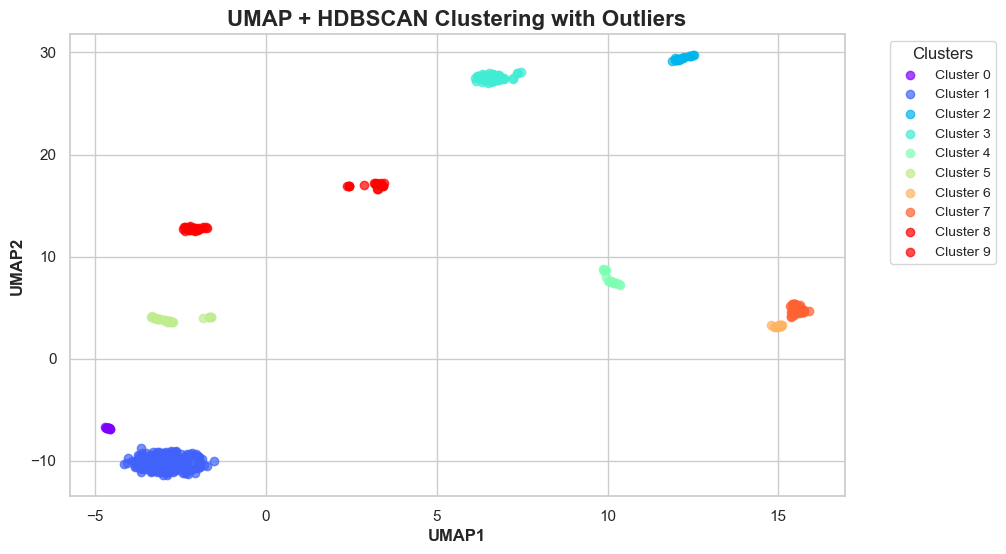

📁 Plot saved as UMAP_HDBSCAN_Genus_Outliers.tiff

📊 Top Genus in Clusters with Outliers:



<Figure size 1200x800 with 0 Axes>

In [7]:
# UMAP + HDBSCAN for Outliers
import umap
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode Genus column for UMAP
print("\n🚀 Step 1: Computing UMAP on Genus Data\n")
encoded_genus = LabelEncoder().fit_transform(merged_df["Genus"])

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = reducer.fit_transform(encoded_genus.reshape(-1, 1))

# Store UMAP results in dataframe
merged_df["UMAP1_Genus"] = umap_results[:, 0]
merged_df["UMAP2_Genus"] = umap_results[:, 1]

# **Debug Check: Print UMAP results**
print(f"UMAP Results Shape: {umap_results.shape}")
print(merged_df[["UMAP1_Genus", "UMAP2_Genus"]].head())

# Step 2: Apply HDBSCAN clustering
print("\n📊 Step 2: Applying HDBSCAN for Outlier Detection\n")
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(umap_results)
merged_df["Genus_Cluster"] = cluster_labels

# **Debug Check: Print cluster labels**
print("Unique Cluster Labels: ", np.unique(cluster_labels))

# Count number of outliers
num_outliers = sum(cluster_labels == -1)
print(f"🔴 Number of detected outliers: {num_outliers}")

# Generate distinct colors for each cluster (excluding outliers)
unique_clusters = np.unique(cluster_labels)
cmap = plt.get_cmap("rainbow", len(unique_clusters) - 1)  # Exclude outliers
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(unique_clusters) if cluster != -1}

# Step 3: Plot the UMAP (Genus Clustering) with outliers
plt.figure(figsize=(10, 6))

# Plot normal clusters
for cluster in unique_clusters:
    if cluster != -1:  # Exclude outliers
        cluster_data = merged_df[merged_df["Genus_Cluster"] == cluster]
        plt.scatter(
            cluster_data["UMAP1_Genus"], cluster_data["UMAP2_Genus"], 
            color=cluster_colors[cluster], alpha=0.7, label=f"Cluster {cluster}"
        )

# **Ensure outlier mask is correct**
outlier_mask = cluster_labels == -1
if np.sum(outlier_mask) > 0:
    plt.scatter(
        merged_df.loc[outlier_mask, "UMAP1_Genus"],
        merged_df.loc[outlier_mask, "UMAP2_Genus"],
        color="black",
        alpha=1.0,
        label="Outliers",
        marker="x",
        s=150,  # Larger marker size for visibility
        linewidths=2  # Thicker 'X' markers
    )

plt.title("UMAP + HDBSCAN Clustering with Outliers", fontsize=16, fontweight='bold', family='Arial')
plt.xlabel("UMAP1", fontsize=12, fontweight='bold', family='Arial')
plt.ylabel("UMAP2", fontsize=12, fontweight='bold', family='Arial')
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
# Show plot
plt.show()

# Save as TIFF
plt.savefig("UMAP_HDBSCAN_Genus_Outliers.tiff", dpi=300, bbox_inches="tight", format="tiff")
print(f"📁 Plot saved as UMAP_HDBSCAN_Genus_Outliers.tiff")

# Step 4: Identify the **top genus** in clusters that contain outliers
print("\n📊 Top Genus in Clusters with Outliers:\n")
clusters_with_outliers = merged_df.loc[outlier_mask, "Genus_Cluster"].unique()

for cluster in clusters_with_outliers:
    if cluster != -1:  # Ignore outlier-only cluster
        cluster_df = merged_df[merged_df["Genus_Cluster"] == cluster]
        if not cluster_df.empty:
            top_genus = cluster_df["Genus"].value_counts().idxmax()
            top_genus_count = cluster_df["Genus"].value_counts().max()
            print(f"✅ Cluster {cluster}: {top_genus} ({top_genus_count} occurrences)")


/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning:

The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.1004722058255413 and the largest is 3.3020882735786947.



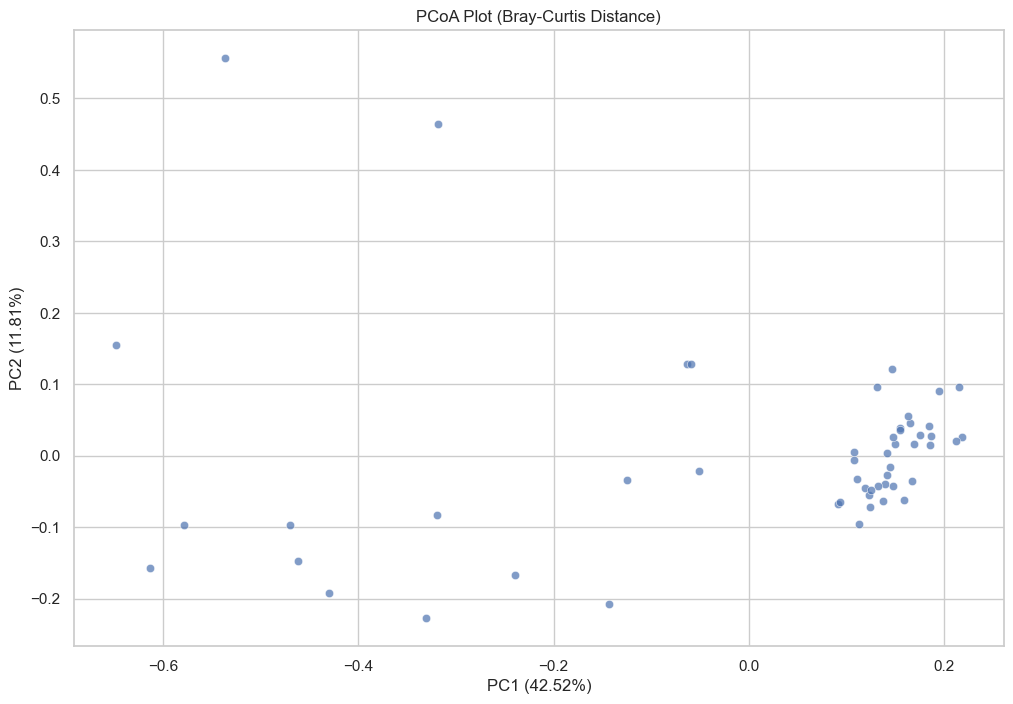

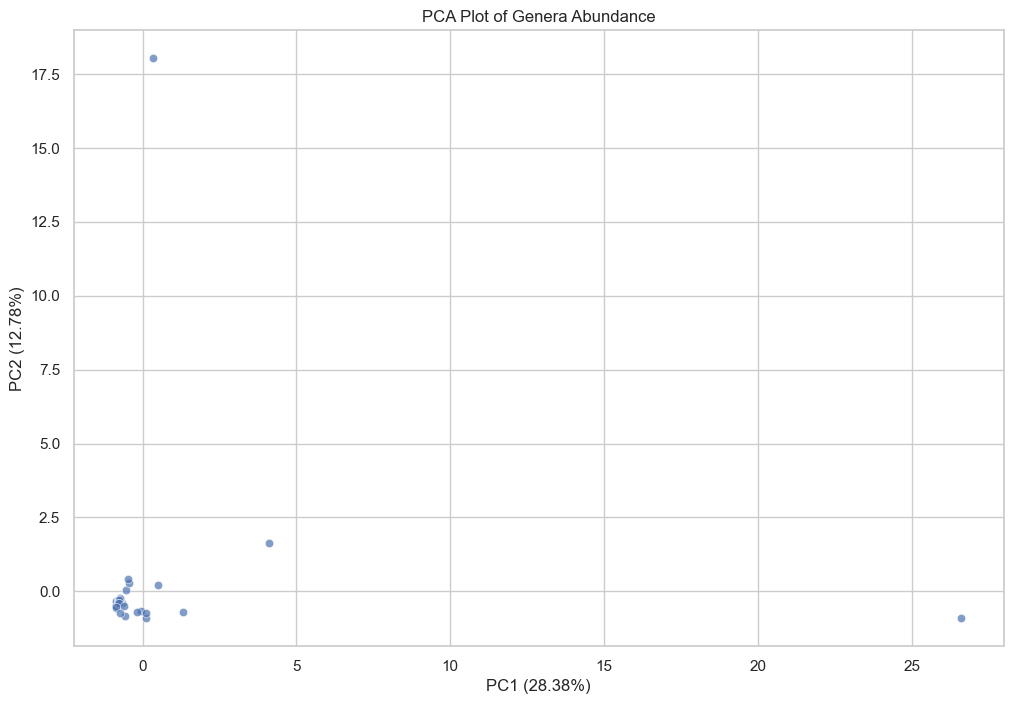

In [8]:
#250221  Beta Diversity Plots 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from skbio.stats.ordination import pcoa
from scipy.spatial.distance import pdist, squareform

# Prepare abundance matrix for Beta Diversity Analysis
genera_abundance = merged_df.groupby(['sampleid', 'Genus'])['pctseqs'].sum().unstack().fillna(0)

# Standardize the abundance data
scaler = StandardScaler()
scaled_abundance = scaler.fit_transform(genera_abundance)

# Compute Bray-Curtis distance matrix
distance_matrix = pdist(scaled_abundance, metric='braycurtis')
bray_curtis_df = pd.DataFrame(squareform(distance_matrix), index=genera_abundance.index, columns=genera_abundance.index)

# Perform PCoA
pcoa_results = pcoa(bray_curtis_df)

# Plot PCoA
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pcoa_results.samples['PC1'], y=pcoa_results.samples['PC2'], alpha=0.7)
plt.title('PCoA Plot (Bray-Curtis Distance)')
plt.xlabel(f'PC1 ({pcoa_results.proportion_explained[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pcoa_results.proportion_explained[1]*100:.2f}%)')
plt.grid(True)
plt.show()

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_abundance)

# Plot PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], alpha=0.7)
plt.title('PCA Plot of Genera Abundance')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.show()

In [9]:
#250219 - This is to get a list of genus index
# Export the list of unique genera
unique_genera = merged_df['Genus'].dropna().unique().tolist()
unique_genera.sort()

# Save to CSV
import pandas as pd
pd.Series(unique_genera).to_csv("unique_genera_list.csv", index=False)

#Now to group them good vs bad vs unknown
import pandas as pd

# Beneficial, Harmful, and Unknown genera lists
beneficial = [
    "Alistipes", "Anaerostipes", "Bacteroides", "Bifidobacterium", "Blautia",
    "Butyricimonas", "Christensenella", "Faecalicatena", "Flavonifractor",
    "Intestinimonas", "Lactonifactor", "Lawsonibacter", "Monoglobus",
    "Parabacteroides", "Phascolarctobacterium", "Phocaeicola", "Ruthenibacterium",
    "Schaalia", "Terrisporobacter", "Thomasclavelia"
]

harmful = [
    "Bilophila", "Clostridium sensu stricto", "Desulfovibrio", "Dialister",
    "Eggerthella", "Elizabethkingia", "Escherichia/Shigella", "Fusobacterium",
    "Guopingia", "Hungatella", "Klebsiella", "Veillonella", "Xanthomonas"
]

unknown = [
    "Anaerococcus", "Anaerotignum", "Anaerotruncus", "Cutibacterium", "Dielma",
    "Eisenbergiella", "Enterocloster", "Extibacter", "Holdemania", "Lacrimispora",
    "Lutispora", "Murimonas", "Oxalobacter", "Peptoniphilus", "Ructibacterium",
    "Sutterella", "Thermanaerosceptrum", "Vescimonas", "Zhenhengia",
    "unknown_Bacillota_Genus", "unknown_Bacteria_Genus", "unknown_Enterobacteriaceae",
    "unknown_Erysipelotrichaceae", "unknown_Eubacteriales_Genus",
    "unknown_Eubacteriales_incertae_sedis_XIII", "unknown_Lachnospiraceae",
    "unknown_Oscillospiraceae"
]

# Create DataFrame
genus_list = beneficial + harmful + unknown
classification = (
    ["Beneficial"] * len(beneficial) +
    ["Harmful"] * len(harmful) +
    ["Unknown/Neutral"] * len(unknown)
)

genus_df = pd.DataFrame({
    "Genus": genus_list,
    "Classification": classification
})

# Save to CSV
genus_df.to_csv("genus_classification.csv", index=False)
print("CSV file 'genus_classification.csv' saved successfully!")


CSV file 'genus_classification.csv' saved successfully!


/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



🔴 Number of detected outliers: 0


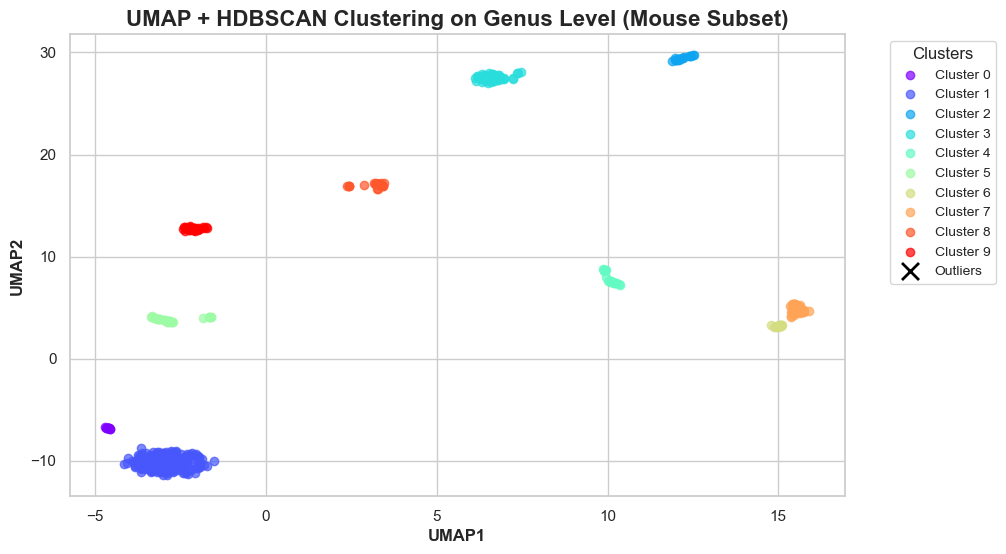

'mus_UMAP_HDBSCAN.tiff'

In [10]:
import umap
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Filter for mouse subset data
mouse_subset = merged_df[(merged_df["sample type"].str.contains("cecal", case=False, na=False)) | 
                         (merged_df["sample type"].str.contains("pellet", case=False, na=False))]

# Step 1: Encode Genus column for UMAP projection
encoded_genus = LabelEncoder().fit_transform(mouse_subset["Genus"])

# Apply UMAP to Genus data
reducer = umap.UMAP(n_components=2, random_state=42, verbose=False)
umap_results = reducer.fit_transform(encoded_genus.reshape(-1, 1))

# Store UMAP results in dataframe
mouse_subset["UMAP1_Genus"] = umap_results[:, 0]
mouse_subset["UMAP2_Genus"] = umap_results[:, 1]

# Step 2: Apply HDBSCAN clustering to identify outliers
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(umap_results)
mouse_subset["Genus_Cluster"] = cluster_labels

# Count number of outliers
num_outliers = sum(cluster_labels == -1)
print(f"🔴 Number of detected outliers: {num_outliers}")

# Generate distinct colors for each cluster
unique_clusters = np.unique(cluster_labels)
cmap = plt.get_cmap("rainbow", len(unique_clusters))
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(unique_clusters)}

# Step 3: Plot the UMAP (Genus Clustering) with outliers
plt.figure(figsize=(10, 6))

# Plot normal clusters
for cluster in unique_clusters:
    if cluster != -1:  # Exclude outliers
        cluster_data = mouse_subset[mouse_subset["Genus_Cluster"] == cluster]
        plt.scatter(
            cluster_data["UMAP1_Genus"], cluster_data["UMAP2_Genus"], 
            color=cluster_colors[cluster], alpha=0.7, label=f"Cluster {cluster}"
        )

# Explicitly plot outliers as large black 'X' markers
outlier_mask = cluster_labels == -1
plt.scatter(
    mouse_subset.loc[outlier_mask, "UMAP1_Genus"],
    mouse_subset.loc[outlier_mask, "UMAP2_Genus"],
    color="black",
    alpha=1.0,
    label="Outliers",
    marker="x",
    s=150,  # Larger marker size for visibility
    linewidths=2  # Thicker 'X' markers
)

plt.title("UMAP + HDBSCAN Clustering on Genus Level (Mouse Subset)", fontsize=16, fontweight='bold', family='Arial')
plt.xlabel("UMAP1", fontsize=12, fontweight='bold', family='Arial')
plt.ylabel("UMAP2", fontsize=12, fontweight='bold', family='Arial')
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)

tiff_filename = "mus_UMAP_HDBSCAN.tiff"  # Adjust for your system
plt.savefig(tiff_filename, dpi=300, bbox_inches="tight", format="tiff")
plt.show()


# Provide download link
tiff_filename


/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



🔴 Number of detected outliers in 3D: 0


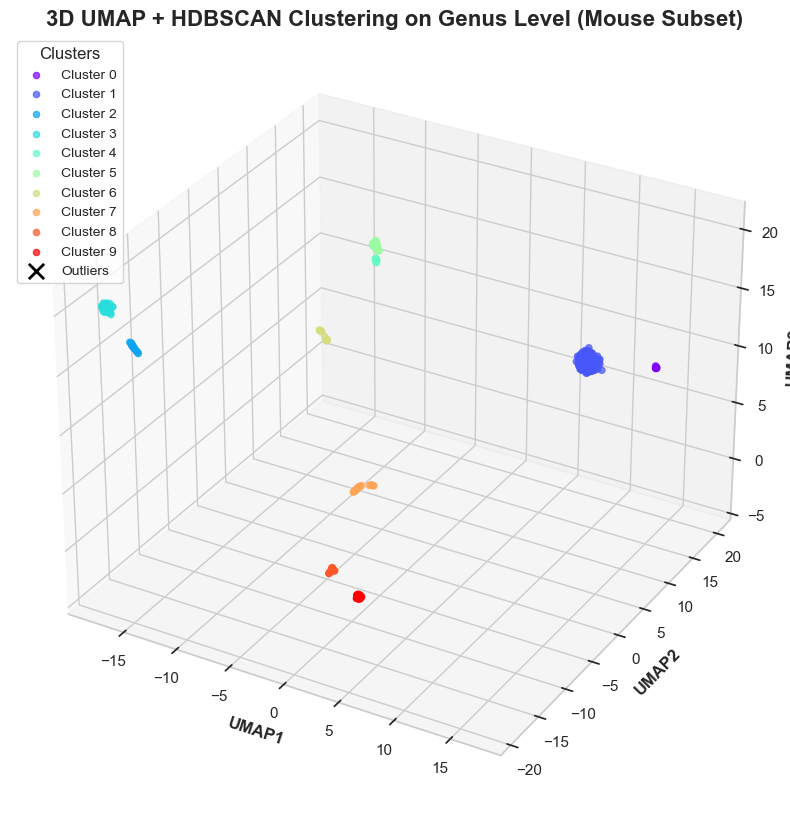

📁 Plot saved as mus_UMAP_HDBSCAN_3D.tiff
📁 Interactive 3D plot saved as mus_UMAP_HDBSCAN_3D.html


('mus_UMAP_HDBSCAN_3D.tiff', 'mus_UMAP_HDBSCAN_3D.html')

In [11]:
# UMAP + HDBSCAN (Outliers) - 3D Plot (Mouse Subset)
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import umap
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ✅ Step 1: Filter for mouse subset data
mouse_subset = merged_df[(merged_df["sample type"].str.contains("cecal", case=False, na=False)) | 
                         (merged_df["sample type"].str.contains("pellet", case=False, na=False))]

# ✅ Step 2: Encode Genus column for UMAP projection
encoded_genus = LabelEncoder().fit_transform(mouse_subset["Genus"])

# ✅ Step 3: Apply 3D UMAP
reducer_3d = umap.UMAP(n_components=3, random_state=42)
umap_results_3d = reducer_3d.fit_transform(encoded_genus.reshape(-1, 1))

# Store UMAP results in dataframe
mouse_subset["UMAP1_Genus_3D"] = umap_results_3d[:, 0]
mouse_subset["UMAP2_Genus_3D"] = umap_results_3d[:, 1]
mouse_subset["UMAP3_Genus_3D"] = umap_results_3d[:, 2]

# ✅ Step 4: Apply HDBSCAN clustering
clusterer_3d = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels_3d = clusterer_3d.fit_predict(umap_results_3d)
mouse_subset["Genus_Cluster_3D"] = cluster_labels_3d

# ✅ Step 5: Count Outliers
num_outliers_3d = sum(cluster_labels_3d == -1)
print(f"🔴 Number of detected outliers in 3D: {num_outliers_3d}")

# ✅ Step 6: Generate distinct colors for each cluster
unique_clusters = np.unique(cluster_labels_3d)
cmap = plt.get_cmap("rainbow", len(unique_clusters))
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(unique_clusters)}

# ✅ Step 7: Static 3D Scatter Plot (Matplotlib)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot normal clusters
for cluster in unique_clusters:
    if cluster != -1:  # Exclude outliers
        cluster_data = mouse_subset[mouse_subset["Genus_Cluster_3D"] == cluster]
        ax.scatter(
            cluster_data["UMAP1_Genus_3D"],
            cluster_data["UMAP2_Genus_3D"],
            cluster_data["UMAP3_Genus_3D"],
            color=cluster_colors[cluster],
            alpha=0.7,
            label=f"Cluster {cluster}"
        )

# ✅ Step 8: Highlight Outliers in BLACK
outlier_mask = cluster_labels_3d == -1
ax.scatter(
    mouse_subset.loc[outlier_mask, "UMAP1_Genus_3D"],
    mouse_subset.loc[outlier_mask, "UMAP2_Genus_3D"],
    mouse_subset.loc[outlier_mask, "UMAP3_Genus_3D"],
    color="black",
    alpha=1.0,
    label="Outliers",
    marker="x",
    s=120,
    linewidths=2
)

# ✅ Step 9: Format Plot
ax.set_title("3D UMAP + HDBSCAN Clustering on Genus Level (Mouse Subset)", fontsize=16, fontweight='bold', family='Arial')
ax.set_xlabel("UMAP1", fontsize=12, fontweight='bold', family='Arial')
ax.set_ylabel("UMAP2", fontsize=12, fontweight='bold', family='Arial')
ax.set_zlabel("UMAP3", fontsize=12, fontweight='bold', family='Arial')
ax.legend(title="Clusters", loc='upper left', fontsize=10)

# ✅ Step 10: Save as TIFF
tiff_filename = "mus_UMAP_HDBSCAN_3D.tiff"
plt.savefig(tiff_filename, format='tiff', dpi=300, bbox_inches='tight')
plt.show()
print(f"📁 Plot saved as {tiff_filename}")

# ✅ Step 11: Interactive 3D Plot (Plotly)
fig_3d = px.scatter_3d(
    mouse_subset, 
    x="UMAP1_Genus_3D", 
    y="UMAP2_Genus_3D", 
    z="UMAP3_Genus_3D", 
    color=mouse_subset["Genus_Cluster_3D"].astype(str),  # Convert to string for coloring
    hover_data=["Genus"],
    title="Interactive 3D UMAP + HDBSCAN Clustering (Mouse Subset)",
)

# ✅ Step 12: Add Outliers in BLACK to Interactive Plot
fig_3d.add_trace(
    px.scatter_3d(
        mouse_subset[outlier_mask],
        x="UMAP1_Genus_3D", 
        y="UMAP2_Genus_3D", 
        z="UMAP3_Genus_3D",
    ).data[0]
)
fig_3d.data[-1].marker.color = "black"
fig_3d.data[-1].marker.symbol = "x"
fig_3d.data[-1].marker.size = 8
fig_3d.data[-1].name = "Outliers"

# ✅ Step 13: Save as Interactive HTML File
html_filename = "mus_UMAP_HDBSCAN_3D.html"
fig_3d.write_html(html_filename)
print(f"📁 Interactive 3D plot saved as {html_filename}")

# ✅ Step 14: Return Download Links
tiff_filename, html_filename



🚀 Running UMAP on Genus Data (Mouse Subset)


/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.




📊 Running PHATE on UMAP Output (Mouse Subset)
Calculating PHATE...
  Running PHATE on 476 observations and 2 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 0.13 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.10 seconds.
Calculated PHATE in 0.27 seconds.


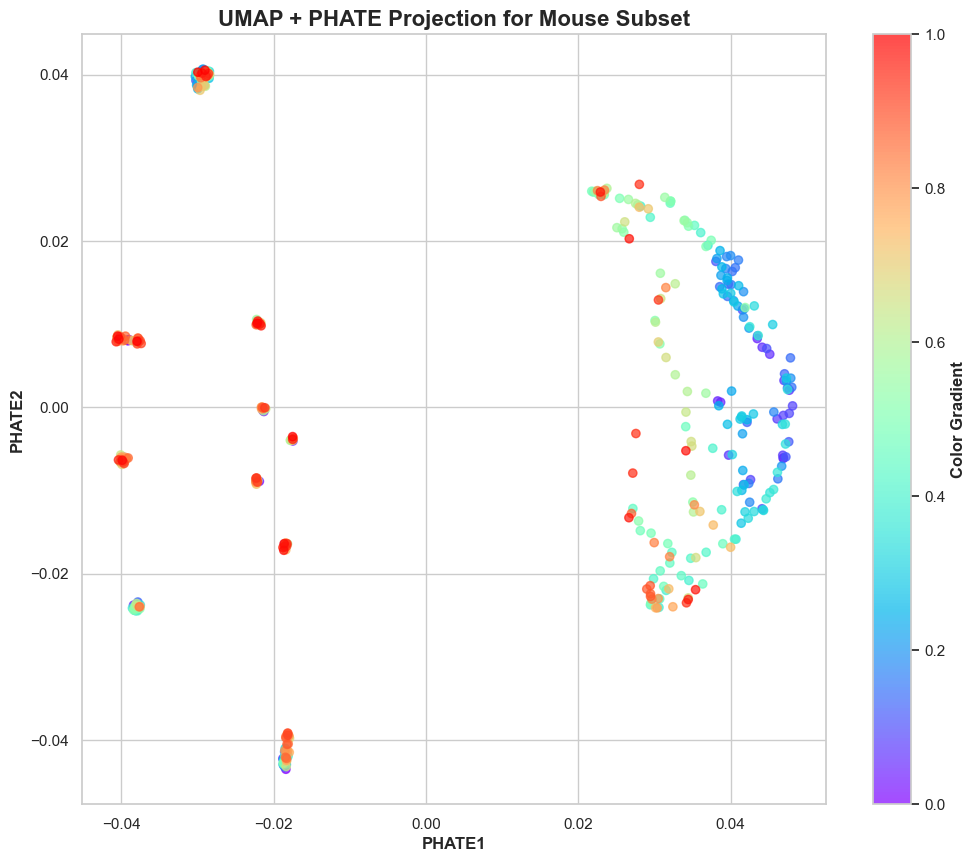

📁 UMAP + PHATE plot saved as mus_UMAP_PHATE.tiff
📁 Interactive UMAP + PHATE plot saved as mus_UMAP_PHATE.html


('mus_UMAP_PHATE.tiff', 'mus_UMAP_PHATE.html')

In [12]:
#UMAP + PHATE on mouse sample subsets
# UMAP + PHATE Clustering (Mouse Subset)
import umap
import phate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder

# ✅ Step 1: Filter for Mouse Subset Data
mouse_subset = merged_df[(merged_df["sample type"].str.contains("cecal", case=False, na=False)) | 
                         (merged_df["sample type"].str.contains("pellet", case=False, na=False))]

# ✅ Step 2: Encode Genus column for UMAP projection
encoded_genus = LabelEncoder().fit_transform(mouse_subset["Genus"])

# ✅ Step 3: Apply UMAP for dimensionality reduction
print("\n🚀 Running UMAP on Genus Data (Mouse Subset)")
reducer_umap = umap.UMAP(n_components=2, random_state=42)
umap_results = reducer_umap.fit_transform(encoded_genus.reshape(-1, 1))

# Store UMAP results in dataframe
mouse_subset["UMAP1_Genus"] = umap_results[:, 0]
mouse_subset["UMAP2_Genus"] = umap_results[:, 1]

# ✅ Step 4: Apply PHATE to UMAP results
print("\n📊 Running PHATE on UMAP Output (Mouse Subset)")
phate_operator = phate.PHATE(random_state=42)
phate_results = phate_operator.fit_transform(umap_results)

# Store PHATE results in dataframe
mouse_subset["PHATE1"] = phate_results[:, 0]
mouse_subset["PHATE2"] = phate_results[:, 1]

# ✅ Step 5: Assign colors dynamically using a smooth gradient
cmap = mpl.colormaps["rainbow"]
num_points = phate_results.shape[0]
color_indices = np.linspace(0, 1, num_points)
colors = cmap(color_indices)

# ✅ Step 6: Generate PHATE Scatter Plot (Matplotlib)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(phate_results[:, 0], phate_results[:, 1], alpha=0.7, c=color_indices, cmap=cmap)

plt.title("UMAP + PHATE Projection for Mouse Subset", fontsize=16, fontweight='bold', family='Arial')
plt.xlabel("PHATE1", fontsize=12, fontweight='bold', family='Arial')
plt.ylabel("PHATE2", fontsize=12, fontweight='bold', family='Arial')
plt.grid(True)

# ✅ Step 7: Add Colorbar
cbar = plt.colorbar(scatter, label="Color Gradient")
cbar.set_label("Color Gradient", fontsize=12, fontweight='bold', family='Arial')

# ✅ Step 8: Save as TIFF
tiff_filename = "mus_UMAP_PHATE.tiff"
plt.savefig(tiff_filename, dpi=300, bbox_inches="tight", format="tiff")
plt.show()
print(f"📁 UMAP + PHATE plot saved as {tiff_filename}")

# ✅ Step 9: Interactive PHATE Plot (Plotly)
import plotly.express as px

fig = px.scatter(
    mouse_subset,
    x="PHATE1",
    y="PHATE2",
    color=color_indices,  # Gradient-based coloring
    color_continuous_scale="rainbow",
    hover_data=["Genus"],
    title="Interactive UMAP + PHATE Clustering (Mouse Subset)"
)

# ✅ Step 10: Save as Interactive HTML
html_filename = "mus_UMAP_PHATE.html"
fig.write_html(html_filename)
print(f"📁 Interactive UMAP + PHATE plot saved as {html_filename}")

# ✅ Step 11: Return Download Links
tiff_filename, html_filename




🚀 Running 3D UMAP on Genus Data (Mouse Subset)


/opt/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.




📊 Running PHATE on 3D UMAP Output (Mouse Subset)
Calculating PHATE...
  Running PHATE on 476 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 0.12 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.56 seconds.
Calculated PHATE in 2.72 seconds.


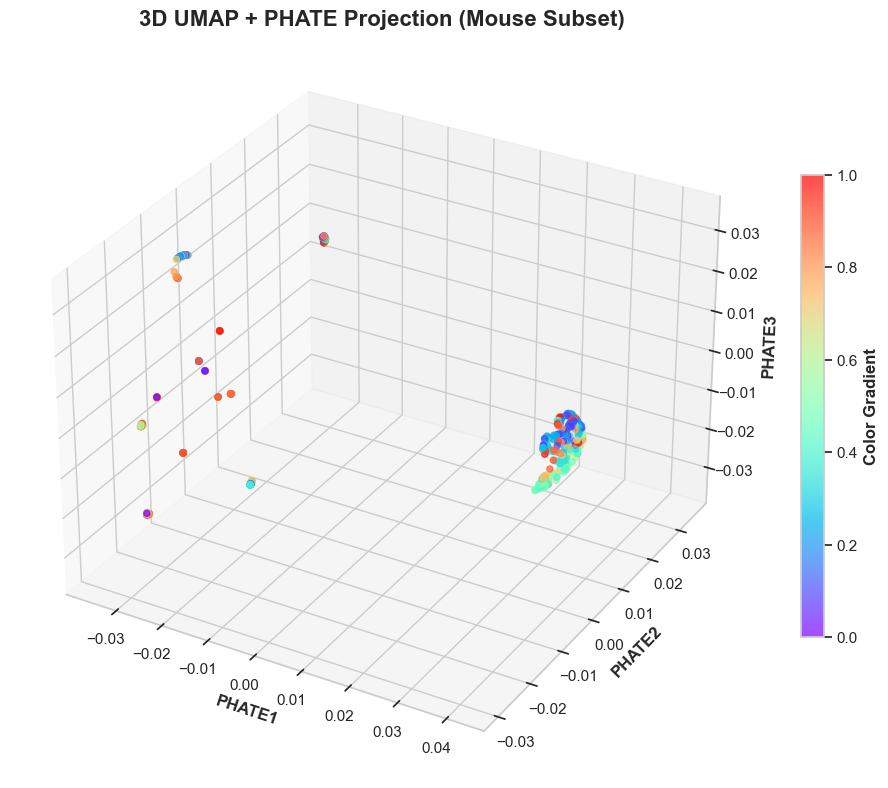

📁 3D UMAP + PHATE plot saved as mus_UMAP_PHATE_3D.tiff
📁 Interactive 3D UMAP + PHATE plot saved as mus_UMAP_PHATE_3D.html


('mus_UMAP_PHATE_3D.tiff', 'mus_UMAP_PHATE_3D.html')

In [13]:
# UMAP + PHATE Clustering (3D, Mouse Subset)
import umap
import phate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# ✅ Step 1: Filter for Mouse Subset Data
mouse_subset = merged_df[(merged_df["sample type"].str.contains("cecal", case=False, na=False)) | 
                         (merged_df["sample type"].str.contains("pellet", case=False, na=False))]

# ✅ Step 2: Encode Genus column for UMAP projection
encoded_genus = LabelEncoder().fit_transform(mouse_subset["Genus"])

# ✅ Step 3: Apply UMAP for 3D dimensionality reduction
print("\n🚀 Running 3D UMAP on Genus Data (Mouse Subset)")
reducer_umap = umap.UMAP(n_components=3, random_state=42)
umap_results_3d = reducer_umap.fit_transform(encoded_genus.reshape(-1, 1))

# Store 3D UMAP results in dataframe
mouse_subset["UMAP1_Genus_3D"] = umap_results_3d[:, 0]
mouse_subset["UMAP2_Genus_3D"] = umap_results_3d[:, 1]
mouse_subset["UMAP3_Genus_3D"] = umap_results_3d[:, 2]

# ✅ Step 4: Apply PHATE to 3D UMAP results
print("\n📊 Running PHATE on 3D UMAP Output (Mouse Subset)")
phate_operator = phate.PHATE(n_components=3, random_state=42)
phate_results_3d = phate_operator.fit_transform(umap_results_3d)

# Store 3D PHATE results in dataframe
mouse_subset["PHATE1_3D"] = phate_results_3d[:, 0]
mouse_subset["PHATE2_3D"] = phate_results_3d[:, 1]
mouse_subset["PHATE3_3D"] = phate_results_3d[:, 2]

# ✅ Step 5: Assign colors dynamically using a smooth gradient
cmap = mpl.colormaps["rainbow"]
num_points = phate_results_3d.shape[0]
color_indices = np.linspace(0, 1, num_points)
colors = cmap(color_indices)

# ✅ Step 6: Generate Static 3D Scatter Plot (Matplotlib)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    phate_results_3d[:, 0], 
    phate_results_3d[:, 1], 
    phate_results_3d[:, 2], 
    alpha=0.7, 
    c=color_indices, 
    cmap="rainbow"
)

ax.set_title("3D UMAP + PHATE Projection (Mouse Subset)", fontsize=16, fontweight="bold", family="Arial")
ax.set_xlabel("PHATE1", fontsize=12, fontweight="bold", family="Arial")
ax.set_ylabel("PHATE2", fontsize=12, fontweight="bold", family="Arial")
ax.set_zlabel("PHATE3", fontsize=12, fontweight="bold", family="Arial")

# ✅ Step 7: Add Colorbar
cbar = fig.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label("Color Gradient", fontsize=12, fontweight="bold", family="Arial")

# ✅ Step 8: Save as TIFF
tiff_filename = "mus_UMAP_PHATE_3D.tiff"
plt.savefig(tiff_filename, dpi=300, bbox_inches="tight", format="tiff")
plt.show()
print(f"📁 3D UMAP + PHATE plot saved as {tiff_filename}")

# ✅ Step 9: Generate Interactive 3D Scatter Plot (Plotly)
fig_3d = px.scatter_3d(
    mouse_subset,
    x="PHATE1_3D",
    y="PHATE2_3D",
    z="PHATE3_3D",
    color=color_indices,  # Gradient-based coloring
    color_continuous_scale="rainbow",
    hover_data=["Genus"],
    title="Interactive 3D UMAP + PHATE Clustering (Mouse Subset)"
)

# ✅ Step 10: Save as Interactive HTML
html_filename = "mus_UMAP_PHATE_3D.html"
fig_3d.write_html(html_filename)
print(f"📁 Interactive 3D UMAP + PHATE plot saved as {html_filename}")

# ✅ Step 11: Return Download Links
tiff_filename, html_filename


In [15]:
# Determining which clusters show smooth transition
import numpy as np
import pandas as pd

# Step 1: Add the color gradient as a numerical column
mouse_subset["Color_Gradient"] = np.linspace(0, 1, len(mouse_subset))

# Step 2: Identify clusters with a wide gradient range
cluster_gradient_ranges = mouse_subset.groupby("Genus_Cluster_3D")["Color_Gradient"].agg(["min", "max"])
cluster_gradient_ranges["Range"] = cluster_gradient_ranges["max"] - cluster_gradient_ranges["min"]

# Step 3: Filter clusters where gradient covers a large portion (e.g., > 0.8 range)
high_gradient_clusters = cluster_gradient_ranges[cluster_gradient_ranges["Range"] > 0.8]

# Step 4: Print results
print(f"🔍 Found {len(high_gradient_clusters)} clusters with strong 0.0 → 1.0 color gradient.")
print(high_gradient_clusters)

# Step 5: Save results to a CSV file
csv_filename = "High_Gradient_Clusters.csv"
high_gradient_clusters.to_csv(csv_filename)

print(f"📁 Saved high-gradient clusters to {csv_filename}")



🔍 Found 8 clusters with strong 0.0 → 1.0 color gradient.
                       min       max     Range
Genus_Cluster_3D                              
1                 0.012632  0.997895  0.985263
2                 0.021053  0.926316  0.905263
3                 0.046316  0.976842  0.930526
4                 0.029474  0.993684  0.964211
5                 0.002105  0.987368  0.985263
7                 0.018947  0.983158  0.964211
8                 0.000000  0.907368  0.907368
9                 0.004211  1.000000  0.995789
📁 Saved high-gradient clusters to High_Gradient_Clusters.csv


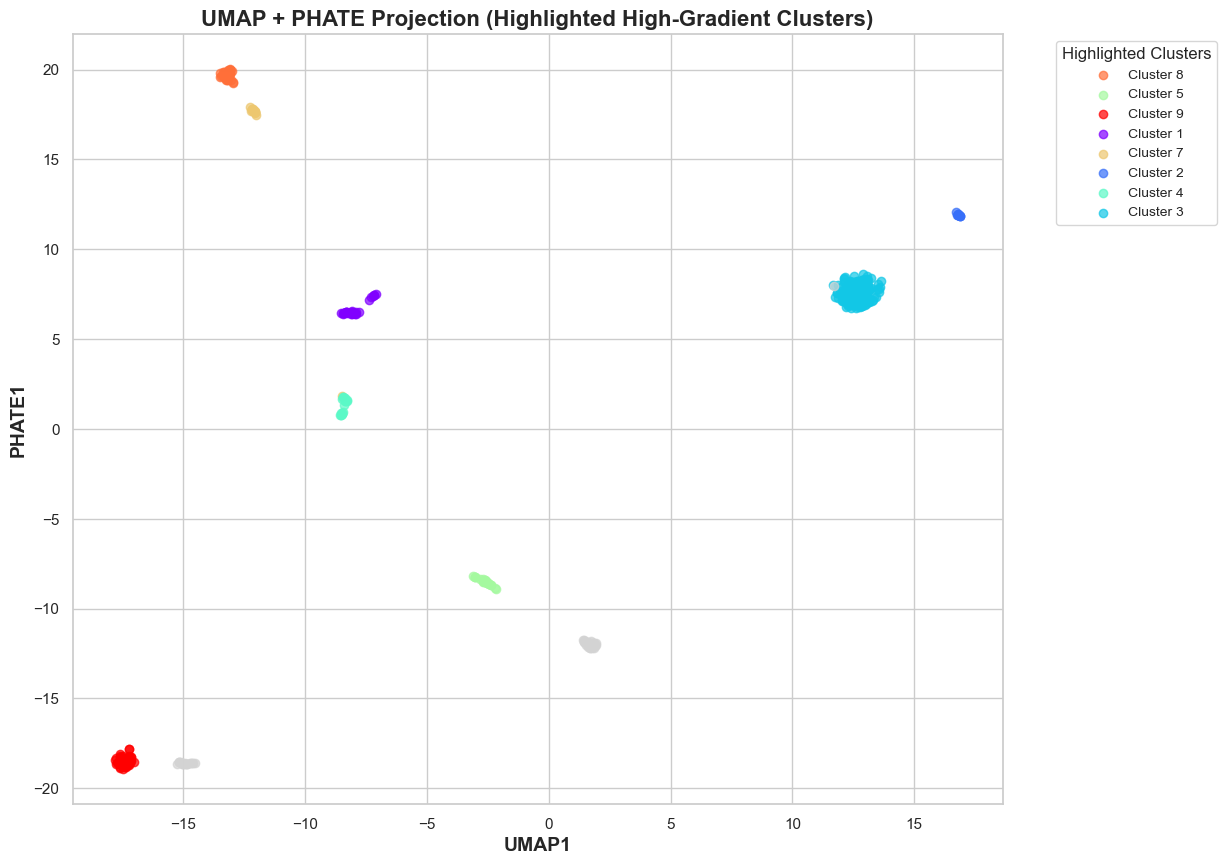

'UMAP_PHATE_Highlighted_Clusters.tiff'

In [17]:
# Replot UMAP + PHATE with non-highlighted clusters in gray
import matplotlib.pyplot as plt
import numpy as np

# Extract clusters to highlight
highlight_clusters = [1, 2, 3, 4, 5, 7, 8, 9]

# Assign colors: Highlighted clusters get distinct colors, others are gray
cmap = plt.get_cmap("rainbow", len(highlight_clusters))
highlight_colors = {cluster: cmap(i) for i, cluster in enumerate(highlight_clusters)}
default_color = "lightgray"

# Create figure
plt.figure(figsize=(12, 10))

# Plot all points, first ensuring non-highlighted clusters are plotted in gray
for cluster in mouse_subset["Genus_Cluster_3D"].unique():
    cluster_data = mouse_subset[mouse_subset["Genus_Cluster_3D"] == cluster]
    
    if cluster in highlight_clusters:
        color = highlight_colors[cluster]
        label = f"Cluster {cluster}"  # Label only highlighted clusters
    else:
        color = default_color
        label = None  # No label for gray clusters

    plt.scatter(
        cluster_data["UMAP1_Genus_3D"], 
        cluster_data["UMAP2_Genus_3D"], 
        color=color, 
        alpha=0.7, 
        label=label
    )

# Add title & labels
plt.title("UMAP + PHATE Projection (Highlighted High-Gradient Clusters)", fontsize=16, fontweight="bold")
plt.xlabel("UMAP1", fontsize=14, fontweight="bold")
plt.ylabel("PHATE1", fontsize=14, fontweight="bold")
plt.legend(title="Highlighted Clusters", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")

# Save plot
tiff_filename = "UMAP_PHATE_Highlighted_Clusters.tiff"
plt.savefig(tiff_filename, dpi=300, bbox_inches="tight", format="tiff")

# Show plot
plt.show()

# Return filename for download
tiff_filename
